
## 4-9. 분류 실습, 케글 산탄데르 고객 만족 예측



### **1. 데이터 전처리**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# data frame으로 로딩
cust_df = pd.read_csv('./train_santander.csv')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [11]:
# 피처 타입 및 NULL 값 확인
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [12]:
# 전체 데이터 중 만족과 불만족 비율 확인
print(cust_df['TARGET'].value_counts())
# 불만족 피처인 Target이 1인 == 불만족한 고객 수를 카운트
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
# 전체 고객 대비 불만족 고객 비율 계산
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [13]:
# 피처 값 분포 확인
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


**이상 값 처리**

var3 칼럼에서 min값이 -999999로 나옴 -> NaN, 혹은 예외 값을 반환 했을 것으로 추정됨

해당값은 데이터에 오차를 줄 수 있으므로, 가장 많이 나온 값인 2로 변환




In [14]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
# ID 열은 단순 식별자에 해당하므로 드롭
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


데이터 세트가 비대칭적이므로, Target값 분포가 학습/테스트 데이터 세트에서 모두 비슷하게 추출되었는지 확인

원본 데이터 세트 전체 대비 불만족값 비율인 4%와 유사한 값으로 생성됨

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


---
### **2. XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

### 1) 학습 모델 생성 후 결과를 ROC AUC로 평가

In [16]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/ho

[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.83783	validation_1-auc:0.81126
[2]	validation_0-auc:0.83892	validation_1-auc:0.81192
[3]	validation_0-auc:0.84090	validation_1-auc:0.81349
[4]	validation_0-auc:0.84187	validation_1-auc:0.81356
[5]	validation_0-auc:0.84355	validation_1-auc:0.81422
[6]	validation_0-auc:0.84534	validation_1-auc:0.81550
[7]	validation_0-auc:0.84658	validation_1-auc:0.81623
[8]	validation_0-auc:0.84727	validation_1-auc:0.81669
[9]	validation_0-auc:0.84794	validation_1-auc:0.81668
[10]	validation_0-auc:0.84980	validation_1-auc:0.81828
[11]	validation_0-auc:0.85105	validation_1-auc:0.81965
[12]	validation_0-auc:0.85217	validation_1-auc:0.81999
[13]	validation_0-auc:0.85301	validation_1-auc:0.82049
[14]	validation_0-auc:0.85558	validation_1-auc:0.82210
[15]	validation_0-auc:0.85662	validation_1-auc:0.82288
[16]	validation_0-auc:0.85811	validation_1-auc:0.82380
[17]	validation_0-auc:0.85864	validation_1-auc:0.82365
[18]	validation_0-au

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


###2) Hyper Opt를 사용한 하이퍼 파라미터 튜닝

(1) 검색 공간 설정

(2) 목적 함수 설정

(3) fmin()으로 최적 하이퍼 파라미터 찾기

**(1) 검색 공간 설정**

In [22]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

**(2) 목적 함수 설정**

XGBoost와 LightGBM에서는 cross_val_score()를 적용하면 early stopping 지원 불가하므로 K-Fold로 구현

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# 목적 함수 설정
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []

    # 3개 k-fold방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1 * np.mean(roc_auc_list)

**(3).fmin()으로 최적 하이퍼 파라미터 찾기**

In [22]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 사용해서 max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/op

[0]	validation_0-auc:0.77226	validation_1-auc:0.74366 
[1]	validation_0-auc:0.83765	validation_1-auc:0.80715 
[2]	validation_0-auc:0.83102	validation_1-auc:0.80078 
[3]	validation_0-auc:0.84165	validation_1-auc:0.81237 
[4]	validation_0-auc:0.84909	validation_1-auc:0.81986 
[5]	validation_0-auc:0.85194	validation_1-auc:0.82242 
[6]	validation_0-auc:0.85389	validation_1-auc:0.82458 
[7]	validation_0-auc:0.85659	validation_1-auc:0.82698 
[8]	validation_0-auc:0.85805	validation_1-auc:0.82747 
[9]	validation_0-auc:0.85831	validation_1-auc:0.82751 
[10]	validation_0-auc:0.85894	validation_1-auc:0.82789
[11]	validation_0-auc:0.85983	validation_1-auc:0.82796
[12]	validation_0-auc:0.86112	validation_1-auc:0.82892
[13]	validation_0-auc:0.86291	validation_1-auc:0.82971
[14]	validation_0-auc:0.86387	validation_1-auc:0.82967
[15]	validation_0-auc:0.86448	validation_1-auc:0.83105
[16]	validation_0-auc:0.86509	validation_1-auc:0.83125
[17]	validation_0-auc:0.86586	validation_1-auc:0.83139
[18]	valid

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77413	validation_1-auc:0.74470 
[1]	validation_0-auc:0.83952	validation_1-auc:0.81298 
[2]	validation_0-auc:0.83257	validation_1-auc:0.80306 
[3]	validation_0-auc:0.84439	validation_1-auc:0.81364 
[4]	validation_0-auc:0.85191	validation_1-auc:0.82172 
  0%|          | 0/50 [00:03<?, ?trial/s, best loss=?]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.85462	validation_1-auc:0.82478 
[6]	validation_0-auc:0.85812	validation_1-auc:0.82839 
[7]	validation_0-auc:0.85904	validation_1-auc:0.83012 
[8]	validation_0-auc:0.86007	validation_1-auc:0.82985 
[9]	validation_0-auc:0.86079	validation_1-auc:0.83104 
[10]	validation_0-auc:0.86181	validation_1-auc:0.83065
[11]	validation_0-auc:0.86278	validation_1-auc:0.83199
[12]	validation_0-auc:0.86302	validation_1-auc:0.83238
[13]	validation_0-auc:0.86466	validation_1-auc:0.83357
[14]	validation_0-auc:0.86552	validation_1-auc:0.83358
[15]	validation_0-auc:0.86578	validation_1-auc:0.83259
[16]	validation_0-auc:0.86640	validation_1-auc:0.83276
[17]	validation_0-auc:0.86683	validation_1-auc:0.83312
[18]	validation_0-auc:0.86722	validation_1-auc:0.83300
[19]	validation_0-auc:0.86801	validation_1-auc:0.83297
[20]	validation_0-auc:0.86882	validation_1-auc:0.83229
[21]	validation_0-auc:0.86967	validation_1-auc:0.83206
[22]	validation_0-auc:0.87042	validation_1-auc:0.83217
[23]	valid

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77298	validation_1-auc:0.75461 
[1]	validation_0-auc:0.83729	validation_1-auc:0.81028 
[2]	validation_0-auc:0.82966	validation_1-auc:0.80418 
[3]	validation_0-auc:0.84354	validation_1-auc:0.81233 
[4]	validation_0-auc:0.85012	validation_1-auc:0.81801 
  0%|          | 0/50 [00:05<?, ?trial/s, best loss=?]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[5]	validation_0-auc:0.85205	validation_1-auc:0.82068 
[6]	validation_0-auc:0.85505	validation_1-auc:0.82286 
[7]	validation_0-auc:0.85735	validation_1-auc:0.82519 
[8]	validation_0-auc:0.85821	validation_1-auc:0.82557 
[9]	validation_0-auc:0.85852	validation_1-auc:0.82610 
[10]	validation_0-auc:0.85943	validation_1-auc:0.82620
[11]	validation_0-auc:0.86054	validation_1-auc:0.82700
[12]	validation_0-auc:0.86135	validation_1-auc:0.82729
[13]	validation_0-auc:0.86215	validation_1-auc:0.82734
[14]	validation_0-auc:0.86278	validation_1-auc:0.82827
[15]	validation_0-auc:0.86397	validation_1-auc:0.82809
[16]	validation_0-auc:0.86547	validation_1-auc:0.82983
[17]	validation_0-auc:0.86627	validation_1-auc:0.83023
[18]	validation_0-auc:0.86741	validation_1-auc:0.83110
[19]	validation_0-auc:0.86849	validation_1-auc:0.83039
[20]	validation_0-auc:0.86976	validation_1-auc:0.83024
[21]	validation_0-auc:0.87114	validation_1-auc:0.83097
[22]	validation_0-auc:0.87167	validation_1-auc:0.83009
[23]	valid

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79842	validation_1-auc:0.73178                            
[1]	validation_0-auc:0.80776	validation_1-auc:0.74315                            
[2]	validation_0-auc:0.82145	validation_1-auc:0.75500                            
  2%|▏         | 1/50 [00:08<06:44,  8.25s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[3]	validation_0-auc:0.85822	validation_1-auc:0.79800                            
[4]	validation_0-auc:0.86741	validation_1-auc:0.81122                            
[5]	validation_0-auc:0.87506	validation_1-auc:0.81802                            
[6]	validation_0-auc:0.87773	validation_1-auc:0.82168                            
[7]	validation_0-auc:0.87930	validation_1-auc:0.82369                            
[8]	validation_0-auc:0.87905	validation_1-auc:0.82184                            
[9]	validation_0-auc:0.88010	validation_1-auc:0.82441                            
[10]	validation_0-auc:0.88382	validation_1-auc:0.82775                           
[11]	validation_0-auc:0.88565	validation_1-auc:0.82962                           
[12]	validation_0-auc:0.88485	validation_1-auc:0.82819                           
[13]	validation_0-auc:0.88535	validation_1-auc:0.82943                           
[14]	validation_0-auc:0.88673	validation_1-auc:0.82974                           
[15]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79785	validation_1-auc:0.73412                            
[1]	validation_0-auc:0.80544	validation_1-auc:0.74797                            
[2]	validation_0-auc:0.81656	validation_1-auc:0.75486                            
[3]	validation_0-auc:0.85612	validation_1-auc:0.79445                            
[4]	validation_0-auc:0.86766	validation_1-auc:0.80911                            
[5]	validation_0-auc:0.87319	validation_1-auc:0.81810                            
[6]	validation_0-auc:0.87636	validation_1-auc:0.82142                            
[7]	validation_0-auc:0.87865	validation_1-auc:0.82408                            
[8]	validation_0-auc:0.87867	validation_1-auc:0.82227                            
[9]	validation_0-auc:0.88019	validation_1-auc:0.82381                            
[10]	validation_0-auc:0.88295	validation_1-auc:0.82584                           
[11]	validation_0-auc:0.88517	validation_1-auc:0.82599                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80041	validation_1-auc:0.74865                            
[1]	validation_0-auc:0.80511	validation_1-auc:0.75501                            
[2]	validation_0-auc:0.81441	validation_1-auc:0.76436                            
[3]	validation_0-auc:0.85655	validation_1-auc:0.79551                            
[4]	validation_0-auc:0.86813	validation_1-auc:0.80753                            
[5]	validation_0-auc:0.87399	validation_1-auc:0.81752                            
[6]	validation_0-auc:0.87619	validation_1-auc:0.82233                            
[7]	validation_0-auc:0.87805	validation_1-auc:0.82397                            
[8]	validation_0-auc:0.87855	validation_1-auc:0.82275                            
[9]	validation_0-auc:0.87951	validation_1-auc:0.82444                            
[10]	validation_0-auc:0.88201	validation_1-auc:0.82538                           
[11]	validation_0-auc:0.88408	validation_1-auc:0.82487                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80762	validation_1-auc:0.74258                            
[1]	validation_0-auc:0.86662	validation_1-auc:0.80992                            
[2]	validation_0-auc:0.86676	validation_1-auc:0.80085                            
[3]	validation_0-auc:0.87702	validation_1-auc:0.81208                            
  4%|▍         | 2/50 [00:18<07:16,  9.10s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.88293	validation_1-auc:0.81960                            
[5]	validation_0-auc:0.89011	validation_1-auc:0.82178                            
[6]	validation_0-auc:0.89111	validation_1-auc:0.82583                            
[7]	validation_0-auc:0.89400	validation_1-auc:0.82739                            
[8]	validation_0-auc:0.89645	validation_1-auc:0.82765                            
[9]	validation_0-auc:0.89853	validation_1-auc:0.82883                            
[10]	validation_0-auc:0.90102	validation_1-auc:0.82851                           
[11]	validation_0-auc:0.90369	validation_1-auc:0.82806                           
[12]	validation_0-auc:0.90461	validation_1-auc:0.82733                           
[13]	validation_0-auc:0.90640	validation_1-auc:0.82868                           
[14]	validation_0-auc:0.90878	validation_1-auc:0.82779                           
[15]	validation_0-auc:0.91030	validation_1-auc:0.82787                           
[16]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80802	validation_1-auc:0.73740                            
[1]	validation_0-auc:0.86334	validation_1-auc:0.80796                            
[2]	validation_0-auc:0.86307	validation_1-auc:0.79842                            
[3]	validation_0-auc:0.87820	validation_1-auc:0.81313                            
  4%|▍         | 2/50 [00:20<07:16,  9.10s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.88550	validation_1-auc:0.81864                            
[5]	validation_0-auc:0.89131	validation_1-auc:0.82309                            
[6]	validation_0-auc:0.89411	validation_1-auc:0.82452                            
[7]	validation_0-auc:0.89626	validation_1-auc:0.82602                            
[8]	validation_0-auc:0.89904	validation_1-auc:0.82836                            
[9]	validation_0-auc:0.90035	validation_1-auc:0.82892                            
[10]	validation_0-auc:0.90362	validation_1-auc:0.82918                           
[11]	validation_0-auc:0.90500	validation_1-auc:0.82939                           
[12]	validation_0-auc:0.90557	validation_1-auc:0.82903                           
[13]	validation_0-auc:0.90811	validation_1-auc:0.83024                           
[14]	validation_0-auc:0.91073	validation_1-auc:0.83073                           
[15]	validation_0-auc:0.91233	validation_1-auc:0.82939                           
[16]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81023	validation_1-auc:0.74688                            
[1]	validation_0-auc:0.86793	validation_1-auc:0.81283                            
[2]	validation_0-auc:0.86455	validation_1-auc:0.80591                            
[3]	validation_0-auc:0.87897	validation_1-auc:0.81521                            
  4%|▍         | 2/50 [00:22<07:16,  9.10s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[4]	validation_0-auc:0.88526	validation_1-auc:0.81818                            
[5]	validation_0-auc:0.88992	validation_1-auc:0.81950                            
[6]	validation_0-auc:0.89162	validation_1-auc:0.82173                            
[7]	validation_0-auc:0.89381	validation_1-auc:0.82267                            
[8]	validation_0-auc:0.89894	validation_1-auc:0.82363                            
[9]	validation_0-auc:0.89991	validation_1-auc:0.82439                            
[10]	validation_0-auc:0.90470	validation_1-auc:0.82435                           
[11]	validation_0-auc:0.90694	validation_1-auc:0.82538                           
[12]	validation_0-auc:0.90774	validation_1-auc:0.82529                           
[13]	validation_0-auc:0.91007	validation_1-auc:0.82512                           
[14]	validation_0-auc:0.91250	validation_1-auc:0.82595                           
[15]	validation_0-auc:0.91443	validation_1-auc:0.82536                           
[16]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81260	validation_1-auc:0.73561                            
[1]	validation_0-auc:0.82016	validation_1-auc:0.74346                            
[2]	validation_0-auc:0.82948	validation_1-auc:0.75294                            
[3]	validation_0-auc:0.86642	validation_1-auc:0.78801                            
  6%|▌         | 3/50 [00:25<06:24,  8.18s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.87621	validation_1-auc:0.80409                            
[5]	validation_0-auc:0.88051	validation_1-auc:0.81195                            
[6]	validation_0-auc:0.88244	validation_1-auc:0.81567                            
[7]	validation_0-auc:0.88338	validation_1-auc:0.81856                            
[8]	validation_0-auc:0.88611	validation_1-auc:0.82207                            
[9]	validation_0-auc:0.88620	validation_1-auc:0.82445                            
[10]	validation_0-auc:0.88849	validation_1-auc:0.82650                           
[11]	validation_0-auc:0.88966	validation_1-auc:0.82824                           
[12]	validation_0-auc:0.88873	validation_1-auc:0.82604                           
[13]	validation_0-auc:0.88976	validation_1-auc:0.82654                           
[14]	validation_0-auc:0.89080	validation_1-auc:0.82774                           
[15]	validation_0-auc:0.89188	validation_1-auc:0.82602                           
[16]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81150	validation_1-auc:0.73992                            
[1]	validation_0-auc:0.82054	validation_1-auc:0.75168                            
[2]	validation_0-auc:0.82662	validation_1-auc:0.75597                            
  6%|▌         | 3/50 [00:29<06:24,  8.18s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[3]	validation_0-auc:0.86380	validation_1-auc:0.79512                            
[4]	validation_0-auc:0.87662	validation_1-auc:0.80961                            
[5]	validation_0-auc:0.88077	validation_1-auc:0.81526                            
[6]	validation_0-auc:0.88235	validation_1-auc:0.82008                            
[7]	validation_0-auc:0.88244	validation_1-auc:0.82214                            
[8]	validation_0-auc:0.88493	validation_1-auc:0.82319                            
[9]	validation_0-auc:0.88460	validation_1-auc:0.82460                            
[10]	validation_0-auc:0.88676	validation_1-auc:0.82575                           
[11]	validation_0-auc:0.88895	validation_1-auc:0.82647                           
[12]	validation_0-auc:0.88866	validation_1-auc:0.82571                           
[13]	validation_0-auc:0.88993	validation_1-auc:0.82642                           
[14]	validation_0-auc:0.89135	validation_1-auc:0.82724                           
[15]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80689	validation_1-auc:0.73751                            
[1]	validation_0-auc:0.81742	validation_1-auc:0.75179                            
[2]	validation_0-auc:0.82661	validation_1-auc:0.75839                            
  6%|▌         | 3/50 [00:33<06:24,  8.18s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[3]	validation_0-auc:0.86426	validation_1-auc:0.79127                            
[4]	validation_0-auc:0.87718	validation_1-auc:0.80482                            
[5]	validation_0-auc:0.88368	validation_1-auc:0.81308                            
[6]	validation_0-auc:0.88597	validation_1-auc:0.81900                            
[7]	validation_0-auc:0.88703	validation_1-auc:0.82104                            
[8]	validation_0-auc:0.88843	validation_1-auc:0.82189                            
[9]	validation_0-auc:0.88812	validation_1-auc:0.82342                            
[10]	validation_0-auc:0.88898	validation_1-auc:0.82364                           
[11]	validation_0-auc:0.88941	validation_1-auc:0.82413                           
[12]	validation_0-auc:0.88973	validation_1-auc:0.82338                           
[13]	validation_0-auc:0.88949	validation_1-auc:0.82417                           
[14]	validation_0-auc:0.89038	validation_1-auc:0.82527                           
[15]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81185	validation_1-auc:0.73682                            
[1]	validation_0-auc:0.87194	validation_1-auc:0.80517                            
[2]	validation_0-auc:0.87530	validation_1-auc:0.79653                            
[3]	validation_0-auc:0.88899	validation_1-auc:0.81156                            
  8%|▊         | 4/50 [00:36<07:18,  9.53s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[4]	validation_0-auc:0.89526	validation_1-auc:0.82024                            
[5]	validation_0-auc:0.89954	validation_1-auc:0.82165                            
[6]	validation_0-auc:0.90179	validation_1-auc:0.82419                            
[7]	validation_0-auc:0.90445	validation_1-auc:0.82689                            
[8]	validation_0-auc:0.90738	validation_1-auc:0.82862                            
[9]	validation_0-auc:0.90940	validation_1-auc:0.82852                            
[10]	validation_0-auc:0.91231	validation_1-auc:0.82772                           
[11]	validation_0-auc:0.91579	validation_1-auc:0.82761                           
[12]	validation_0-auc:0.91826	validation_1-auc:0.82737                           
[13]	validation_0-auc:0.92137	validation_1-auc:0.82574                           
[14]	validation_0-auc:0.92325	validation_1-auc:0.82589                           
[15]	validation_0-auc:0.92478	validation_1-auc:0.82531                           
[16]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81479	validation_1-auc:0.73671                            
[1]	validation_0-auc:0.86989	validation_1-auc:0.80517                            
[2]	validation_0-auc:0.86855	validation_1-auc:0.79774                            
[3]	validation_0-auc:0.88453	validation_1-auc:0.81303                            
[4]	validation_0-auc:0.89174	validation_1-auc:0.81923                            
[5]	validation_0-auc:0.89761	validation_1-auc:0.82275                            
[6]	validation_0-auc:0.90193	validation_1-auc:0.82396                            
[7]	validation_0-auc:0.90531	validation_1-auc:0.82625                            
[8]	validation_0-auc:0.90840	validation_1-auc:0.82646                            
[9]	validation_0-auc:0.91079	validation_1-auc:0.82795                            
[10]	validation_0-auc:0.91399	validation_1-auc:0.82738                           
[11]	validation_0-auc:0.91759	validation_1-auc:0.82769                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81310	validation_1-auc:0.74154                            
[1]	validation_0-auc:0.87233	validation_1-auc:0.80747                            
[2]	validation_0-auc:0.87074	validation_1-auc:0.80207                            
[3]	validation_0-auc:0.88429	validation_1-auc:0.81401                            
  8%|▊         | 4/50 [00:40<07:18,  9.53s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.89049	validation_1-auc:0.81745                            
[5]	validation_0-auc:0.89763	validation_1-auc:0.81716                            
[6]	validation_0-auc:0.90201	validation_1-auc:0.81891                            
[7]	validation_0-auc:0.90728	validation_1-auc:0.82271                            
[8]	validation_0-auc:0.91274	validation_1-auc:0.82198                            
[9]	validation_0-auc:0.91366	validation_1-auc:0.82325                            
[10]	validation_0-auc:0.91730	validation_1-auc:0.82437                           
[11]	validation_0-auc:0.92038	validation_1-auc:0.82506                           
[12]	validation_0-auc:0.92280	validation_1-auc:0.82520                           
[13]	validation_0-auc:0.92586	validation_1-auc:0.82582                           
[14]	validation_0-auc:0.92801	validation_1-auc:0.82617                           
[15]	validation_0-auc:0.93037	validation_1-auc:0.82574                           
[16]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78501	validation_1-auc:0.74045                            
[1]	validation_0-auc:0.78930	validation_1-auc:0.74351                            
[2]	validation_0-auc:0.79616	validation_1-auc:0.75276                            
[3]	validation_0-auc:0.83755	validation_1-auc:0.79704                            
 10%|█         | 5/50 [00:42<06:11,  8.25s/trial, best loss: -0.8362430214120593]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.84963	validation_1-auc:0.81047                            
[5]	validation_0-auc:0.85547	validation_1-auc:0.81781                            
[6]	validation_0-auc:0.85771	validation_1-auc:0.82317                            
[7]	validation_0-auc:0.85993	validation_1-auc:0.82618                            
[8]	validation_0-auc:0.86347	validation_1-auc:0.82782                            
[9]	validation_0-auc:0.86483	validation_1-auc:0.82941                            
[10]	validation_0-auc:0.86642	validation_1-auc:0.83087                           
[11]	validation_0-auc:0.86844	validation_1-auc:0.83067                           
[12]	validation_0-auc:0.86803	validation_1-auc:0.82936                           
[13]	validation_0-auc:0.86831	validation_1-auc:0.83030                           
[14]	validation_0-auc:0.86946	validation_1-auc:0.83096                           
[15]	validation_0-auc:0.86968	validation_1-auc:0.83047                           
[16]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78570	validation_1-auc:0.74229                            
[1]	validation_0-auc:0.79077	validation_1-auc:0.74735                            
[2]	validation_0-auc:0.79915	validation_1-auc:0.75076                            
[3]	validation_0-auc:0.83845	validation_1-auc:0.79676                            
[4]	validation_0-auc:0.85097	validation_1-auc:0.81280                            
[5]	validation_0-auc:0.85765	validation_1-auc:0.81993                            
[6]	validation_0-auc:0.86024	validation_1-auc:0.82263                            
[7]	validation_0-auc:0.86190	validation_1-auc:0.82577                            
[8]	validation_0-auc:0.86495	validation_1-auc:0.82836                            
[9]	validation_0-auc:0.86621	validation_1-auc:0.82984                            
[10]	validation_0-auc:0.86779	validation_1-auc:0.83143                           
[11]	validation_0-auc:0.86884	validation_1-auc:0.83176                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78395	validation_1-auc:0.75771                            
[1]	validation_0-auc:0.79195	validation_1-auc:0.76134                            
[2]	validation_0-auc:0.79617	validation_1-auc:0.76645                            
[3]	validation_0-auc:0.83864	validation_1-auc:0.80001                            
[4]	validation_0-auc:0.85030	validation_1-auc:0.81318                            
[5]	validation_0-auc:0.85797	validation_1-auc:0.81988                            
[6]	validation_0-auc:0.85975	validation_1-auc:0.82316                            
[7]	validation_0-auc:0.86184	validation_1-auc:0.82355                            
[8]	validation_0-auc:0.86481	validation_1-auc:0.82476                            
[9]	validation_0-auc:0.86531	validation_1-auc:0.82555                            
[10]	validation_0-auc:0.86590	validation_1-auc:0.82635                           
[11]	validation_0-auc:0.86598	validation_1-auc:0.82728                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78281	validation_1-auc:0.73704                            
[1]	validation_0-auc:0.78899	validation_1-auc:0.74231                            
[2]	validation_0-auc:0.79694	validation_1-auc:0.75181                            
[3]	validation_0-auc:0.83795	validation_1-auc:0.79426                            
[4]	validation_0-auc:0.85122	validation_1-auc:0.80917                            
                                                                                 

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.85664	validation_1-auc:0.81761
[6]	validation_0-auc:0.85899	validation_1-auc:0.82263                            
[7]	validation_0-auc:0.86130	validation_1-auc:0.82531                            
[8]	validation_0-auc:0.86474	validation_1-auc:0.82765                            
[9]	validation_0-auc:0.86604	validation_1-auc:0.82819                            
[10]	validation_0-auc:0.86854	validation_1-auc:0.82992                           
[11]	validation_0-auc:0.87131	validation_1-auc:0.83130                           
[12]	validation_0-auc:0.87129	validation_1-auc:0.83015                           
[13]	validation_0-auc:0.87208	validation_1-auc:0.83070                           
[14]	validation_0-auc:0.87348	validation_1-auc:0.83128                           
[15]	validation_0-auc:0.87442	validation_1-auc:0.83052                           
[16]	validation_0-auc:0.87460	validation_1-auc:0.82845                           
[17]	validation_0-auc:0.87660	validation_1-a

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78749	validation_1-auc:0.74482                            
[1]	validation_0-auc:0.79401	validation_1-auc:0.74849                            
[2]	validation_0-auc:0.80076	validation_1-auc:0.75425                            
[3]	validation_0-auc:0.84056	validation_1-auc:0.79886                            
[4]	validation_0-auc:0.85333	validation_1-auc:0.81369                            
[5]	validation_0-auc:0.86040	validation_1-auc:0.82012                            
[6]	validation_0-auc:0.86308	validation_1-auc:0.82299                            
[7]	validation_0-auc:0.86509	validation_1-auc:0.82651                            
[8]	validation_0-auc:0.86958	validation_1-auc:0.83058                            
[9]	validation_0-auc:0.87046	validation_1-auc:0.83124                            
[10]	validation_0-auc:0.87254	validation_1-auc:0.83216                           
[11]	validation_0-auc:0.87334	validation_1-auc:0.83324                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77920	validation_1-auc:0.74489                            
[1]	validation_0-auc:0.79335	validation_1-auc:0.75383                            
 12%|█▏        | 6/50 [00:55<05:56,  8.10s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[2]	validation_0-auc:0.79982	validation_1-auc:0.76303                            
[3]	validation_0-auc:0.84315	validation_1-auc:0.80094                            
[4]	validation_0-auc:0.85567	validation_1-auc:0.81363                            
[5]	validation_0-auc:0.86230	validation_1-auc:0.81862                            
[6]	validation_0-auc:0.86445	validation_1-auc:0.82166                            
[7]	validation_0-auc:0.86561	validation_1-auc:0.82243                            
[8]	validation_0-auc:0.86917	validation_1-auc:0.82475                            
[9]	validation_0-auc:0.86957	validation_1-auc:0.82553                            
[10]	validation_0-auc:0.87156	validation_1-auc:0.82688                           
[11]	validation_0-auc:0.87250	validation_1-auc:0.82817                           
[12]	validation_0-auc:0.87230	validation_1-auc:0.82720                           
[13]	validation_0-auc:0.87285	validation_1-auc:0.82887                           
[14]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80939	validation_1-auc:0.73475                            
[1]	validation_0-auc:0.87052	validation_1-auc:0.80391                            
[2]	validation_0-auc:0.86924	validation_1-auc:0.79398                            
[3]	validation_0-auc:0.88345	validation_1-auc:0.80588                            
[4]	validation_0-auc:0.88946	validation_1-auc:0.81516                            
[5]	validation_0-auc:0.89180	validation_1-auc:0.81893                            
[6]	validation_0-auc:0.89344	validation_1-auc:0.82341                            
[7]	validation_0-auc:0.89426	validation_1-auc:0.82537                            
[8]	validation_0-auc:0.89597	validation_1-auc:0.82625                            
[9]	validation_0-auc:0.89622	validation_1-auc:0.82698                            
[10]	validation_0-auc:0.89829	validation_1-auc:0.82756                           
[11]	validation_0-auc:0.89985	validation_1-auc:0.82785                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81373	validation_1-auc:0.72978                            
[1]	validation_0-auc:0.87054	validation_1-auc:0.80457                            
[2]	validation_0-auc:0.86643	validation_1-auc:0.79760                            
 14%|█▍        | 7/50 [01:00<05:41,  7.94s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[3]	validation_0-auc:0.87988	validation_1-auc:0.80963                            
[4]	validation_0-auc:0.88745	validation_1-auc:0.81737                            
[5]	validation_0-auc:0.88985	validation_1-auc:0.82177                            
[6]	validation_0-auc:0.89184	validation_1-auc:0.82312                            
[7]	validation_0-auc:0.89483	validation_1-auc:0.82543                            
[8]	validation_0-auc:0.89751	validation_1-auc:0.82686                            
[9]	validation_0-auc:0.89904	validation_1-auc:0.82848                            
[10]	validation_0-auc:0.90178	validation_1-auc:0.82973                           
[11]	validation_0-auc:0.90292	validation_1-auc:0.82971                           
[12]	validation_0-auc:0.90325	validation_1-auc:0.83028                           
[13]	validation_0-auc:0.90412	validation_1-auc:0.83048                           
[14]	validation_0-auc:0.90525	validation_1-auc:0.83125                           
[15]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81417	validation_1-auc:0.73955                            
[1]	validation_0-auc:0.86883	validation_1-auc:0.80613                            
 14%|█▍        | 7/50 [01:03<05:41,  7.94s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[2]	validation_0-auc:0.86622	validation_1-auc:0.79756                            
[3]	validation_0-auc:0.87955	validation_1-auc:0.80971                            
[4]	validation_0-auc:0.88625	validation_1-auc:0.81676                            
[5]	validation_0-auc:0.89019	validation_1-auc:0.81961                            
[6]	validation_0-auc:0.89229	validation_1-auc:0.82244                            
[7]	validation_0-auc:0.89366	validation_1-auc:0.82397                            
[8]	validation_0-auc:0.89555	validation_1-auc:0.82316                            
[9]	validation_0-auc:0.89569	validation_1-auc:0.82462                            
[10]	validation_0-auc:0.89681	validation_1-auc:0.82483                           
[11]	validation_0-auc:0.89834	validation_1-auc:0.82453                           
[12]	validation_0-auc:0.89890	validation_1-auc:0.82503                           
[13]	validation_0-auc:0.89972	validation_1-auc:0.82552                           
[14]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77174	validation_1-auc:0.74269                            
[1]	validation_0-auc:0.84004	validation_1-auc:0.81364                            
[2]	validation_0-auc:0.82962	validation_1-auc:0.80159                            
[3]	validation_0-auc:0.84161	validation_1-auc:0.81195                            
 16%|█▌        | 8/50 [01:07<05:52,  8.40s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[4]	validation_0-auc:0.84956	validation_1-auc:0.82222                            
[5]	validation_0-auc:0.85350	validation_1-auc:0.82461                            
[6]	validation_0-auc:0.85663	validation_1-auc:0.82616                            
[7]	validation_0-auc:0.85834	validation_1-auc:0.82743                            
[8]	validation_0-auc:0.86246	validation_1-auc:0.82883                            
[9]	validation_0-auc:0.86327	validation_1-auc:0.82939                            
[10]	validation_0-auc:0.86384	validation_1-auc:0.82981                           
[11]	validation_0-auc:0.86611	validation_1-auc:0.82848                           
[12]	validation_0-auc:0.86685	validation_1-auc:0.82885                           
[13]	validation_0-auc:0.86819	validation_1-auc:0.82881                           
[14]	validation_0-auc:0.86960	validation_1-auc:0.82780                           
[15]	validation_0-auc:0.87137	validation_1-auc:0.82887                           
[16]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77589	validation_1-auc:0.74189                            
[1]	validation_0-auc:0.83961	validation_1-auc:0.81268                            
[2]	validation_0-auc:0.83126	validation_1-auc:0.80245                            
[3]	validation_0-auc:0.84498	validation_1-auc:0.81655                            
[4]	validation_0-auc:0.85228	validation_1-auc:0.82273                            
 16%|█▌        | 8/50 [01:09<05:52,  8.40s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[5]	validation_0-auc:0.85562	validation_1-auc:0.82551                            
[6]	validation_0-auc:0.85837	validation_1-auc:0.82932                            
[7]	validation_0-auc:0.86008	validation_1-auc:0.83022                            
[8]	validation_0-auc:0.86234	validation_1-auc:0.83172                            
[9]	validation_0-auc:0.86410	validation_1-auc:0.83216                            
[10]	validation_0-auc:0.86532	validation_1-auc:0.83268                           
[11]	validation_0-auc:0.86620	validation_1-auc:0.83257                           
[12]	validation_0-auc:0.86700	validation_1-auc:0.83282                           
[13]	validation_0-auc:0.86826	validation_1-auc:0.83263                           
[14]	validation_0-auc:0.86906	validation_1-auc:0.83284                           
[15]	validation_0-auc:0.87075	validation_1-auc:0.83255                           
[16]	validation_0-auc:0.87222	validation_1-auc:0.83435                           
[17]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76954	validation_1-auc:0.75199                            
[1]	validation_0-auc:0.84009	validation_1-auc:0.81111                            
[2]	validation_0-auc:0.83134	validation_1-auc:0.80382                            
[3]	validation_0-auc:0.84489	validation_1-auc:0.81539                            
[4]	validation_0-auc:0.85084	validation_1-auc:0.81907                            
[5]	validation_0-auc:0.85327	validation_1-auc:0.82083                            
[6]	validation_0-auc:0.85717	validation_1-auc:0.82521                            
[7]	validation_0-auc:0.85925	validation_1-auc:0.82641                            
[8]	validation_0-auc:0.86127	validation_1-auc:0.82842                            
[9]	validation_0-auc:0.86272	validation_1-auc:0.82856                            
[10]	validation_0-auc:0.86358	validation_1-auc:0.82954                           
[11]	validation_0-auc:0.86620	validation_1-auc:0.83077                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81345	validation_1-auc:0.72903                            
[1]	validation_0-auc:0.87487	validation_1-auc:0.80031                            
[2]	validation_0-auc:0.87407	validation_1-auc:0.78941                            
 18%|█▊        | 9/50 [01:14<05:23,  7.89s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[3]	validation_0-auc:0.88373	validation_1-auc:0.80553                            
[4]	validation_0-auc:0.89296	validation_1-auc:0.81607                            
[5]	validation_0-auc:0.89730	validation_1-auc:0.82005                            
[6]	validation_0-auc:0.90088	validation_1-auc:0.82380                            
[7]	validation_0-auc:0.90351	validation_1-auc:0.82571                            
[8]	validation_0-auc:0.90617	validation_1-auc:0.82666                            
[9]	validation_0-auc:0.90732	validation_1-auc:0.82685                            
[10]	validation_0-auc:0.90951	validation_1-auc:0.82624                           
[11]	validation_0-auc:0.91303	validation_1-auc:0.82474                           
[12]	validation_0-auc:0.91557	validation_1-auc:0.82493                           
[13]	validation_0-auc:0.91809	validation_1-auc:0.82442                           
[14]	validation_0-auc:0.92129	validation_1-auc:0.82512                           
[15]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81342	validation_1-auc:0.73420                            
[1]	validation_0-auc:0.87113	validation_1-auc:0.80097                            
[2]	validation_0-auc:0.86809	validation_1-auc:0.79101                            
[3]	validation_0-auc:0.88726	validation_1-auc:0.81047                            
[4]	validation_0-auc:0.89365	validation_1-auc:0.81422                            
[5]	validation_0-auc:0.89849	validation_1-auc:0.81872                            
[6]	validation_0-auc:0.90177	validation_1-auc:0.82224                            
[7]	validation_0-auc:0.90447	validation_1-auc:0.82543                            
[8]	validation_0-auc:0.90751	validation_1-auc:0.82659                            
[9]	validation_0-auc:0.90966	validation_1-auc:0.82886                            
[10]	validation_0-auc:0.91327	validation_1-auc:0.83012                           
[11]	validation_0-auc:0.91639	validation_1-auc:0.83038                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81554	validation_1-auc:0.74273                            
[1]	validation_0-auc:0.87666	validation_1-auc:0.80046                            
[2]	validation_0-auc:0.87206	validation_1-auc:0.79369                            
[3]	validation_0-auc:0.88493	validation_1-auc:0.80716                            
[4]	validation_0-auc:0.88913	validation_1-auc:0.81168                            
[5]	validation_0-auc:0.89423	validation_1-auc:0.81377                            
[6]	validation_0-auc:0.89866	validation_1-auc:0.81626                            
[7]	validation_0-auc:0.90246	validation_1-auc:0.81691                            
[8]	validation_0-auc:0.90823	validation_1-auc:0.81762                            
[9]	validation_0-auc:0.91018	validation_1-auc:0.82091                            
[10]	validation_0-auc:0.91404	validation_1-auc:0.82267                           
[11]	validation_0-auc:0.91583	validation_1-auc:0.82299                           
[12]	validation_

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81717	validation_1-auc:0.73466                             
[1]	validation_0-auc:0.87487	validation_1-auc:0.80351                             
[2]	validation_0-auc:0.87511	validation_1-auc:0.79383                             


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[3]	validation_0-auc:0.88882	validation_1-auc:0.80483
[4]	validation_0-auc:0.89663	validation_1-auc:0.81430                             
[5]	validation_0-auc:0.89909	validation_1-auc:0.81777                             
[6]	validation_0-auc:0.90000	validation_1-auc:0.82060                             
[7]	validation_0-auc:0.89907	validation_1-auc:0.82130                             
[8]	validation_0-auc:0.90025	validation_1-auc:0.82145                             
[9]	validation_0-auc:0.89934	validation_1-auc:0.82193                             
[10]	validation_0-auc:0.90110	validation_1-auc:0.82256                            
[11]	validation_0-auc:0.90155	validation_1-auc:0.82464                            
[12]	validation_0-auc:0.90105	validation_1-auc:0.82306                            
[13]	validation_0-auc:0.90282	validation_1-auc:0.82337                            
[14]	validation_0-auc:0.90314	validation_1-auc:0.82339                            
[15]	validation_0-auc:0.90384	val

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.82601	validation_1-auc:0.73479                             
[1]	validation_0-auc:0.87829	validation_1-auc:0.80270                             
[2]	validation_0-auc:0.87396	validation_1-auc:0.79377                             
 20%|██        | 10/50 [01:25<05:03,  7.59s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[3]	validation_0-auc:0.88816	validation_1-auc:0.80880                             
[4]	validation_0-auc:0.89474	validation_1-auc:0.81656                             
[5]	validation_0-auc:0.89723	validation_1-auc:0.81830                             
[6]	validation_0-auc:0.89884	validation_1-auc:0.82273                             
[7]	validation_0-auc:0.89878	validation_1-auc:0.82379                             
[8]	validation_0-auc:0.89992	validation_1-auc:0.82509                             
[9]	validation_0-auc:0.89912	validation_1-auc:0.82605                             
[10]	validation_0-auc:0.90197	validation_1-auc:0.82648                            
[11]	validation_0-auc:0.90288	validation_1-auc:0.82734                            
[12]	validation_0-auc:0.90301	validation_1-auc:0.82678                            
[13]	validation_0-auc:0.90485	validation_1-auc:0.82672                            
[14]	validation_0-auc:0.90534	validation_1-auc:0.82776                            
[15]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.82896	validation_1-auc:0.73884                             
[1]	validation_0-auc:0.88029	validation_1-auc:0.80464                             
[2]	validation_0-auc:0.87684	validation_1-auc:0.79575                             
 20%|██        | 10/50 [01:29<05:03,  7.59s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[3]	validation_0-auc:0.88876	validation_1-auc:0.80573                             
[4]	validation_0-auc:0.89695	validation_1-auc:0.81291                             
[5]	validation_0-auc:0.90030	validation_1-auc:0.81448                             
[6]	validation_0-auc:0.90149	validation_1-auc:0.81836                             
[7]	validation_0-auc:0.90189	validation_1-auc:0.82081                             
[8]	validation_0-auc:0.90209	validation_1-auc:0.82132                             
[9]	validation_0-auc:0.90183	validation_1-auc:0.82269                             
[10]	validation_0-auc:0.90353	validation_1-auc:0.82249                            
[11]	validation_0-auc:0.90504	validation_1-auc:0.82294                            
[12]	validation_0-auc:0.90520	validation_1-auc:0.82177                            
[13]	validation_0-auc:0.90589	validation_1-auc:0.82292                            
[14]	validation_0-auc:0.90673	validation_1-auc:0.82365                            
[15]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.82309	validation_1-auc:0.71571                             
[1]	validation_0-auc:0.88703	validation_1-auc:0.79034                             
 22%|██▏       | 11/50 [01:31<05:25,  8.34s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[2]	validation_0-auc:0.88670	validation_1-auc:0.78349                             
[3]	validation_0-auc:0.90067	validation_1-auc:0.79974                             
[4]	validation_0-auc:0.90595	validation_1-auc:0.80812                             
[5]	validation_0-auc:0.91229	validation_1-auc:0.81383                             
[6]	validation_0-auc:0.91569	validation_1-auc:0.81697                             
[7]	validation_0-auc:0.91975	validation_1-auc:0.81999                             
[8]	validation_0-auc:0.92282	validation_1-auc:0.82107                             
[9]	validation_0-auc:0.92515	validation_1-auc:0.82227                             
[10]	validation_0-auc:0.92858	validation_1-auc:0.82118                            
[11]	validation_0-auc:0.93003	validation_1-auc:0.82176                            
[12]	validation_0-auc:0.93096	validation_1-auc:0.82216                            
[13]	validation_0-auc:0.93365	validation_1-auc:0.82116                            
[14]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.82530	validation_1-auc:0.72586                             
[1]	validation_0-auc:0.88867	validation_1-auc:0.79570                             
[2]	validation_0-auc:0.88574	validation_1-auc:0.78928                             
[3]	validation_0-auc:0.90469	validation_1-auc:0.80501                             
[4]	validation_0-auc:0.91148	validation_1-auc:0.81103                             
[5]	validation_0-auc:0.91671	validation_1-auc:0.81285                             
[6]	validation_0-auc:0.91839	validation_1-auc:0.81567                             
[7]	validation_0-auc:0.92205	validation_1-auc:0.81915                             
[8]	validation_0-auc:0.92357	validation_1-auc:0.81996                             
[9]	validation_0-auc:0.92579	validation_1-auc:0.82219                             
[10]	validation_0-auc:0.92950	validation_1-auc:0.82394                            
[11]	validation_0-auc:0.93245	validation_1-auc:0.82449                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.82677	validation_1-auc:0.74080                             
[1]	validation_0-auc:0.88807	validation_1-auc:0.79238                             
[2]	validation_0-auc:0.88721	validation_1-auc:0.78259                             
[3]	validation_0-auc:0.90069	validation_1-auc:0.79844                             
[4]	validation_0-auc:0.90672	validation_1-auc:0.80553                             
[5]	validation_0-auc:0.90978	validation_1-auc:0.80838                             
[6]	validation_0-auc:0.91312	validation_1-auc:0.80934                             
[7]	validation_0-auc:0.91663	validation_1-auc:0.80998                             
[8]	validation_0-auc:0.92262	validation_1-auc:0.81194                             
[9]	validation_0-auc:0.92559	validation_1-auc:0.81539                             
[10]	validation_0-auc:0.92950	validation_1-auc:0.81605                            
[11]	validation_0-auc:0.93103	validation_1-auc:0.81686                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79247	validation_1-auc:0.74081                             
[1]	validation_0-auc:0.79871	validation_1-auc:0.74010                             
[2]	validation_0-auc:0.80708	validation_1-auc:0.75371                             
[3]	validation_0-auc:0.84527	validation_1-auc:0.79720                             
 24%|██▍       | 12/50 [01:37<04:55,  7.77s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.85268	validation_1-auc:0.80971                             
[5]	validation_0-auc:0.85807	validation_1-auc:0.81519                             
[6]	validation_0-auc:0.86035	validation_1-auc:0.81886                             
[7]	validation_0-auc:0.86268	validation_1-auc:0.82165                             
[8]	validation_0-auc:0.86409	validation_1-auc:0.82327                             
[9]	validation_0-auc:0.86496	validation_1-auc:0.82398                             
[10]	validation_0-auc:0.86692	validation_1-auc:0.82582                            
[11]	validation_0-auc:0.86867	validation_1-auc:0.82737                            
[12]	validation_0-auc:0.86733	validation_1-auc:0.82574                            
[13]	validation_0-auc:0.86762	validation_1-auc:0.82624                            
[14]	validation_0-auc:0.86907	validation_1-auc:0.82755                            
[15]	validation_0-auc:0.86901	validation_1-auc:0.82618                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79316	validation_1-auc:0.73877                             
[1]	validation_0-auc:0.80185	validation_1-auc:0.74999                             
[2]	validation_0-auc:0.80471	validation_1-auc:0.75388                             
[3]	validation_0-auc:0.83882	validation_1-auc:0.79382                             


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.85197	validation_1-auc:0.80866
[5]	validation_0-auc:0.85821	validation_1-auc:0.81732                             
[6]	validation_0-auc:0.86117	validation_1-auc:0.82091                             
[7]	validation_0-auc:0.86238	validation_1-auc:0.82370                             
[8]	validation_0-auc:0.86384	validation_1-auc:0.82560                             
[9]	validation_0-auc:0.86431	validation_1-auc:0.82616                             
[10]	validation_0-auc:0.86659	validation_1-auc:0.82706                            
[11]	validation_0-auc:0.86797	validation_1-auc:0.82816                            
[12]	validation_0-auc:0.86722	validation_1-auc:0.82691                            
[13]	validation_0-auc:0.86842	validation_1-auc:0.82798                            
[14]	validation_0-auc:0.86910	validation_1-auc:0.82895                            
[15]	validation_0-auc:0.86889	validation_1-auc:0.82737                            
[16]	validation_0-auc:0.86831	val

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79282	validation_1-auc:0.75155                             
[1]	validation_0-auc:0.80014	validation_1-auc:0.76033                             
[2]	validation_0-auc:0.80417	validation_1-auc:0.76591                             
[3]	validation_0-auc:0.84058	validation_1-auc:0.79895                             
[4]	validation_0-auc:0.85270	validation_1-auc:0.81100                             
[5]	validation_0-auc:0.85904	validation_1-auc:0.81763                             
[6]	validation_0-auc:0.86191	validation_1-auc:0.82007                             
[7]	validation_0-auc:0.86312	validation_1-auc:0.82212                             
[8]	validation_0-auc:0.86513	validation_1-auc:0.82234                             
[9]	validation_0-auc:0.86569	validation_1-auc:0.82359                             
[10]	validation_0-auc:0.86631	validation_1-auc:0.82483                            
[11]	validation_0-auc:0.86700	validation_1-auc:0.82548                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80705	validation_1-auc:0.74099                             
[1]	validation_0-auc:0.86776	validation_1-auc:0.80280                             
[2]	validation_0-auc:0.86437	validation_1-auc:0.79185                             
[3]	validation_0-auc:0.87379	validation_1-auc:0.80520                             
 26%|██▌       | 13/50 [01:48<05:18,  8.61s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[4]	validation_0-auc:0.87963	validation_1-auc:0.81478                             
[5]	validation_0-auc:0.88130	validation_1-auc:0.81741                             
[6]	validation_0-auc:0.88233	validation_1-auc:0.82004                             
[7]	validation_0-auc:0.88301	validation_1-auc:0.82010                             
[8]	validation_0-auc:0.88429	validation_1-auc:0.82062                             
[9]	validation_0-auc:0.88472	validation_1-auc:0.82253                             
[10]	validation_0-auc:0.88653	validation_1-auc:0.82344                            
[11]	validation_0-auc:0.88751	validation_1-auc:0.82361                            
[12]	validation_0-auc:0.88881	validation_1-auc:0.82452                            
[13]	validation_0-auc:0.89012	validation_1-auc:0.82454                            
[14]	validation_0-auc:0.89112	validation_1-auc:0.82520                            
[15]	validation_0-auc:0.89266	validation_1-auc:0.82545                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80977	validation_1-auc:0.73229                             
[1]	validation_0-auc:0.86356	validation_1-auc:0.80336                             
[2]	validation_0-auc:0.85860	validation_1-auc:0.79279                             
[3]	validation_0-auc:0.86862	validation_1-auc:0.80818                             
[4]	validation_0-auc:0.87694	validation_1-auc:0.81606                             
[5]	validation_0-auc:0.87825	validation_1-auc:0.81994                             
[6]	validation_0-auc:0.87936	validation_1-auc:0.82172                             
[7]	validation_0-auc:0.88189	validation_1-auc:0.82428                             
[8]	validation_0-auc:0.88367	validation_1-auc:0.82721                             
[9]	validation_0-auc:0.88446	validation_1-auc:0.82855                             
[10]	validation_0-auc:0.88614	validation_1-auc:0.82947                            
[11]	validation_0-auc:0.88904	validation_1-auc:0.82935                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80954	validation_1-auc:0.74727                             
[1]	validation_0-auc:0.86687	validation_1-auc:0.80358                             
[2]	validation_0-auc:0.85927	validation_1-auc:0.79635                             
[3]	validation_0-auc:0.87022	validation_1-auc:0.80843                             
 26%|██▌       | 13/50 [01:53<05:18,  8.61s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.87695	validation_1-auc:0.81706                             
[5]	validation_0-auc:0.88066	validation_1-auc:0.81912                             
[6]	validation_0-auc:0.88256	validation_1-auc:0.82073                             
[7]	validation_0-auc:0.88393	validation_1-auc:0.82069                             
[8]	validation_0-auc:0.88596	validation_1-auc:0.82096                             
[9]	validation_0-auc:0.88621	validation_1-auc:0.82148                             
[10]	validation_0-auc:0.88832	validation_1-auc:0.82214                            
[11]	validation_0-auc:0.88886	validation_1-auc:0.82231                            
[12]	validation_0-auc:0.88921	validation_1-auc:0.82285                            
[13]	validation_0-auc:0.89078	validation_1-auc:0.82299                            
[14]	validation_0-auc:0.89153	validation_1-auc:0.82360                            
[15]	validation_0-auc:0.89307	validation_1-auc:0.82350                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77228	validation_1-auc:0.74403                             
[1]	validation_0-auc:0.83547	validation_1-auc:0.81061                             
[2]	validation_0-auc:0.82912	validation_1-auc:0.80348                             
[3]	validation_0-auc:0.83934	validation_1-auc:0.81214                             
[4]	validation_0-auc:0.84384	validation_1-auc:0.82076                             
 28%|██▊       | 14/50 [01:57<05:10,  8.63s/trial, best loss: -0.8368486801674523]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.84854	validation_1-auc:0.82610                             
[6]	validation_0-auc:0.85076	validation_1-auc:0.82900                             
[7]	validation_0-auc:0.85179	validation_1-auc:0.82931                             
[8]	validation_0-auc:0.85371	validation_1-auc:0.83059                             
[9]	validation_0-auc:0.85402	validation_1-auc:0.83034                             
[10]	validation_0-auc:0.85538	validation_1-auc:0.83035                            
[11]	validation_0-auc:0.85620	validation_1-auc:0.83166                            
[12]	validation_0-auc:0.85638	validation_1-auc:0.83123                            
[13]	validation_0-auc:0.85733	validation_1-auc:0.83151                            
[14]	validation_0-auc:0.85869	validation_1-auc:0.83166                            
[15]	validation_0-auc:0.85867	validation_1-auc:0.83101                            
[16]	validation_0-auc:0.85997	validation_1-auc:0.83170                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77680	validation_1-auc:0.73812                             
[1]	validation_0-auc:0.83831	validation_1-auc:0.81123                             
[2]	validation_0-auc:0.83242	validation_1-auc:0.80369                             
[3]	validation_0-auc:0.84388	validation_1-auc:0.81658                             
[4]	validation_0-auc:0.85005	validation_1-auc:0.82264                             
[5]	validation_0-auc:0.85288	validation_1-auc:0.82610                             
[6]	validation_0-auc:0.85550	validation_1-auc:0.82932                             
[7]	validation_0-auc:0.85617	validation_1-auc:0.83050                             
[8]	validation_0-auc:0.85827	validation_1-auc:0.83058                             
[9]	validation_0-auc:0.85838	validation_1-auc:0.83122                             
[10]	validation_0-auc:0.85946	validation_1-auc:0.83108                            
[11]	validation_0-auc:0.85988	validation_1-auc:0.83011                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77528	validation_1-auc:0.75761                             
[1]	validation_0-auc:0.83539	validation_1-auc:0.81430                             
[2]	validation_0-auc:0.82946	validation_1-auc:0.80805                             
[3]	validation_0-auc:0.84019	validation_1-auc:0.81498                             
[4]	validation_0-auc:0.84666	validation_1-auc:0.82065                             
[5]	validation_0-auc:0.84940	validation_1-auc:0.82356                             
[6]	validation_0-auc:0.85215	validation_1-auc:0.82534                             
[7]	validation_0-auc:0.85402	validation_1-auc:0.82730                             
[8]	validation_0-auc:0.85424	validation_1-auc:0.82688                             
[9]	validation_0-auc:0.85444	validation_1-auc:0.82676                             
[10]	validation_0-auc:0.85540	validation_1-auc:0.82674                            
[11]	validation_0-auc:0.85581	validation_1-auc:0.82725                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81144	validation_1-auc:0.73302                             
[1]	validation_0-auc:0.82364	validation_1-auc:0.73834                             
[2]	validation_0-auc:0.84095	validation_1-auc:0.74898                             
[3]	validation_0-auc:0.88229	validation_1-auc:0.78853                             
 30%|███       | 15/50 [02:06<05:05,  8.74s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.89700	validation_1-auc:0.80283                             
[5]	validation_0-auc:0.90186	validation_1-auc:0.81359                             
[6]	validation_0-auc:0.90496	validation_1-auc:0.81749                             
[7]	validation_0-auc:0.90648	validation_1-auc:0.81919                             
[8]	validation_0-auc:0.90875	validation_1-auc:0.81801                             
[9]	validation_0-auc:0.91008	validation_1-auc:0.82134                             
[10]	validation_0-auc:0.91327	validation_1-auc:0.82378                            
[11]	validation_0-auc:0.91727	validation_1-auc:0.82543                            
[12]	validation_0-auc:0.91844	validation_1-auc:0.82418                            
[13]	validation_0-auc:0.91945	validation_1-auc:0.82541                            
[14]	validation_0-auc:0.92170	validation_1-auc:0.82733                            
[15]	validation_0-auc:0.92436	validation_1-auc:0.82573                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81116	validation_1-auc:0.73370                             
[1]	validation_0-auc:0.82086	validation_1-auc:0.74589                             
[2]	validation_0-auc:0.83433	validation_1-auc:0.75239                             
[3]	validation_0-auc:0.88052	validation_1-auc:0.79475                             
[4]	validation_0-auc:0.89417	validation_1-auc:0.80758                             
[5]	validation_0-auc:0.90001	validation_1-auc:0.81567                             
[6]	validation_0-auc:0.90350	validation_1-auc:0.82004                             
[7]	validation_0-auc:0.90634	validation_1-auc:0.82443                             
[8]	validation_0-auc:0.90766	validation_1-auc:0.82144                             
[9]	validation_0-auc:0.90857	validation_1-auc:0.82469                             
[10]	validation_0-auc:0.91226	validation_1-auc:0.82715                            
[11]	validation_0-auc:0.91578	validation_1-auc:0.82639                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81662	validation_1-auc:0.74246                             
[1]	validation_0-auc:0.82831	validation_1-auc:0.75084                             
[2]	validation_0-auc:0.84074	validation_1-auc:0.75383                             
[3]	validation_0-auc:0.88576	validation_1-auc:0.78546                             
[4]	validation_0-auc:0.89886	validation_1-auc:0.79766                             
[5]	validation_0-auc:0.90387	validation_1-auc:0.80824                             
[6]	validation_0-auc:0.90543	validation_1-auc:0.81221                             
[7]	validation_0-auc:0.90610	validation_1-auc:0.81496                             
[8]	validation_0-auc:0.90974	validation_1-auc:0.81363                             
[9]	validation_0-auc:0.91145	validation_1-auc:0.81680                             
[10]	validation_0-auc:0.91482	validation_1-auc:0.81947                            
[11]	validation_0-auc:0.91862	validation_1-auc:0.81948                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78278	validation_1-auc:0.73988                             
[1]	validation_0-auc:0.84433	validation_1-auc:0.81124                             
[2]	validation_0-auc:0.83942	validation_1-auc:0.80187                             
[3]	validation_0-auc:0.84999	validation_1-auc:0.81505                             
[4]	validation_0-auc:0.85457	validation_1-auc:0.82174                             
 32%|███▏      | 16/50 [02:13<04:41,  8.29s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.85760	validation_1-auc:0.82462                             
[6]	validation_0-auc:0.86112	validation_1-auc:0.82648                             
[7]	validation_0-auc:0.86285	validation_1-auc:0.82966                             
[8]	validation_0-auc:0.86389	validation_1-auc:0.83045                             
[9]	validation_0-auc:0.86415	validation_1-auc:0.83069                             
[10]	validation_0-auc:0.86607	validation_1-auc:0.83114                            
[11]	validation_0-auc:0.86702	validation_1-auc:0.83135                            
[12]	validation_0-auc:0.86729	validation_1-auc:0.83140                            
[13]	validation_0-auc:0.86861	validation_1-auc:0.83148                            
[14]	validation_0-auc:0.87012	validation_1-auc:0.83188                            
[15]	validation_0-auc:0.87047	validation_1-auc:0.83244                            
[16]	validation_0-auc:0.87074	validation_1-auc:0.83264                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78526	validation_1-auc:0.73932                             
[1]	validation_0-auc:0.84483	validation_1-auc:0.81259                             
[2]	validation_0-auc:0.83959	validation_1-auc:0.80405                             
[3]	validation_0-auc:0.84999	validation_1-auc:0.81610                             
[4]	validation_0-auc:0.85716	validation_1-auc:0.82392                             
[5]	validation_0-auc:0.85953	validation_1-auc:0.82575                             
[6]	validation_0-auc:0.86264	validation_1-auc:0.82877                             
[7]	validation_0-auc:0.86434	validation_1-auc:0.83116                             
[8]	validation_0-auc:0.86596	validation_1-auc:0.83198                             
[9]	validation_0-auc:0.86621	validation_1-auc:0.83287                             
[10]	validation_0-auc:0.86814	validation_1-auc:0.83255                            
[11]	validation_0-auc:0.86956	validation_1-auc:0.83210                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78366	validation_1-auc:0.75669                             
[1]	validation_0-auc:0.84237	validation_1-auc:0.81133                             
[2]	validation_0-auc:0.83734	validation_1-auc:0.80784                             
[3]	validation_0-auc:0.85130	validation_1-auc:0.81703                             
[4]	validation_0-auc:0.85669	validation_1-auc:0.82010                             
[5]	validation_0-auc:0.85922	validation_1-auc:0.82131                             
[6]	validation_0-auc:0.85998	validation_1-auc:0.82217                             
[7]	validation_0-auc:0.86371	validation_1-auc:0.82397                             
[8]	validation_0-auc:0.86505	validation_1-auc:0.82517                             
[9]	validation_0-auc:0.86500	validation_1-auc:0.82647                             
[10]	validation_0-auc:0.86561	validation_1-auc:0.82667                            
[11]	validation_0-auc:0.86685	validation_1-auc:0.82702                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.82000	validation_1-auc:0.73321                             
[1]	validation_0-auc:0.88314	validation_1-auc:0.79894                             
[2]	validation_0-auc:0.88051	validation_1-auc:0.78544                             
 34%|███▍      | 17/50 [02:20<04:18,  7.82s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[3]	validation_0-auc:0.89179	validation_1-auc:0.79937                             
[4]	validation_0-auc:0.90084	validation_1-auc:0.80804                             
[5]	validation_0-auc:0.90320	validation_1-auc:0.81125                             
[6]	validation_0-auc:0.90623	validation_1-auc:0.81378                             
[7]	validation_0-auc:0.90854	validation_1-auc:0.81544                             
[8]	validation_0-auc:0.91267	validation_1-auc:0.81636                             
[9]	validation_0-auc:0.91382	validation_1-auc:0.81822                             
[10]	validation_0-auc:0.91658	validation_1-auc:0.81923                            
[11]	validation_0-auc:0.91885	validation_1-auc:0.82087                            
[12]	validation_0-auc:0.91943	validation_1-auc:0.82132                            
[13]	validation_0-auc:0.92194	validation_1-auc:0.82060                            
[14]	validation_0-auc:0.92435	validation_1-auc:0.82035                            
[15]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.82211	validation_1-auc:0.72850                             
[1]	validation_0-auc:0.88052	validation_1-auc:0.79705                             
[2]	validation_0-auc:0.87745	validation_1-auc:0.78828                             
[3]	validation_0-auc:0.89297	validation_1-auc:0.80222                             
[4]	validation_0-auc:0.89891	validation_1-auc:0.81301                             
[5]	validation_0-auc:0.90548	validation_1-auc:0.81699                             
[6]	validation_0-auc:0.90818	validation_1-auc:0.81931                             
[7]	validation_0-auc:0.91137	validation_1-auc:0.82056                             
[8]	validation_0-auc:0.91552	validation_1-auc:0.82346                             
[9]	validation_0-auc:0.91635	validation_1-auc:0.82646                             
[10]	validation_0-auc:0.91973	validation_1-auc:0.82627                            
[11]	validation_0-auc:0.92129	validation_1-auc:0.82708                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.82084	validation_1-auc:0.73845                             
[1]	validation_0-auc:0.87956	validation_1-auc:0.79847                             
[2]	validation_0-auc:0.87726	validation_1-auc:0.78984                             
[3]	validation_0-auc:0.89272	validation_1-auc:0.80334                             
[4]	validation_0-auc:0.90187	validation_1-auc:0.80920                             
[5]	validation_0-auc:0.90497	validation_1-auc:0.81145                             
[6]	validation_0-auc:0.90712	validation_1-auc:0.81345                             
[7]	validation_0-auc:0.90860	validation_1-auc:0.81433                             
[8]	validation_0-auc:0.91054	validation_1-auc:0.81500                             
[9]	validation_0-auc:0.91191	validation_1-auc:0.81766                             
[10]	validation_0-auc:0.91508	validation_1-auc:0.81903                            
[11]	validation_0-auc:0.91923	validation_1-auc:0.81920                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80733	validation_1-auc:0.72984                             
[1]	validation_0-auc:0.86888	validation_1-auc:0.80014                             
[2]	validation_0-auc:0.86246	validation_1-auc:0.78971                             
[3]	validation_0-auc:0.87255	validation_1-auc:0.80286                             
[4]	validation_0-auc:0.87978	validation_1-auc:0.80840                             
[5]	validation_0-auc:0.88154	validation_1-auc:0.81457                             
[6]	validation_0-auc:0.88281	validation_1-auc:0.81631                             
[7]	validation_0-auc:0.88421	validation_1-auc:0.81738                             
[8]	validation_0-auc:0.88596	validation_1-auc:0.81798                             
[9]	validation_0-auc:0.88751	validation_1-auc:0.82112                             
[10]	validation_0-auc:0.88977	validation_1-auc:0.82249                            
[11]	validation_0-auc:0.89171	validation_1-auc:0.82352                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80803	validation_1-auc:0.73615                             
[1]	validation_0-auc:0.86307	validation_1-auc:0.80398                             
[2]	validation_0-auc:0.85908	validation_1-auc:0.79350                             
[3]	validation_0-auc:0.87050	validation_1-auc:0.81048                             
[4]	validation_0-auc:0.87789	validation_1-auc:0.81762                             
[5]	validation_0-auc:0.88231	validation_1-auc:0.82237                             
[6]	validation_0-auc:0.88535	validation_1-auc:0.82354                             
[7]	validation_0-auc:0.88885	validation_1-auc:0.82518                             
[8]	validation_0-auc:0.89122	validation_1-auc:0.82651                             
[9]	validation_0-auc:0.89184	validation_1-auc:0.82812                             
[10]	validation_0-auc:0.89408	validation_1-auc:0.82897                            
[11]	validation_0-auc:0.89512	validation_1-auc:0.82840                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81035	validation_1-auc:0.74465                             
[1]	validation_0-auc:0.86738	validation_1-auc:0.80322                             
[2]	validation_0-auc:0.86018	validation_1-auc:0.79557                             
[3]	validation_0-auc:0.87348	validation_1-auc:0.80793                             
 36%|███▌      | 18/50 [02:32<03:58,  7.46s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.87887	validation_1-auc:0.81660                             
[5]	validation_0-auc:0.88187	validation_1-auc:0.81885                             
[6]	validation_0-auc:0.88471	validation_1-auc:0.81992                             
[7]	validation_0-auc:0.88648	validation_1-auc:0.81960                             
[8]	validation_0-auc:0.88830	validation_1-auc:0.82067                             
[9]	validation_0-auc:0.88955	validation_1-auc:0.82196                             
[10]	validation_0-auc:0.88988	validation_1-auc:0.82244                            
[11]	validation_0-auc:0.89092	validation_1-auc:0.82193                            
[12]	validation_0-auc:0.89127	validation_1-auc:0.82241                            
[13]	validation_0-auc:0.89331	validation_1-auc:0.82434                            
[14]	validation_0-auc:0.89526	validation_1-auc:0.82446                            
[15]	validation_0-auc:0.89758	validation_1-auc:0.82451                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78210	validation_1-auc:0.74759                             
[1]	validation_0-auc:0.84339	validation_1-auc:0.81296                             
[2]	validation_0-auc:0.83961	validation_1-auc:0.80447                             
[3]	validation_0-auc:0.85084	validation_1-auc:0.81674                             
[4]	validation_0-auc:0.85493	validation_1-auc:0.82463                             
[5]	validation_0-auc:0.85716	validation_1-auc:0.82684                             
 38%|███▊      | 19/50 [02:36<04:08,  8.03s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[6]	validation_0-auc:0.85831	validation_1-auc:0.82990                             
[7]	validation_0-auc:0.86037	validation_1-auc:0.83074                             
[8]	validation_0-auc:0.86259	validation_1-auc:0.83242                             
[9]	validation_0-auc:0.86331	validation_1-auc:0.83294                             
[10]	validation_0-auc:0.86473	validation_1-auc:0.83320                            
[11]	validation_0-auc:0.86618	validation_1-auc:0.83295                            
[12]	validation_0-auc:0.86646	validation_1-auc:0.83256                            
[13]	validation_0-auc:0.86822	validation_1-auc:0.83306                            
[14]	validation_0-auc:0.86934	validation_1-auc:0.83307                            
[15]	validation_0-auc:0.86937	validation_1-auc:0.83296                            
[16]	validation_0-auc:0.87060	validation_1-auc:0.83340                            
[17]	validation_0-auc:0.87186	validation_1-auc:0.83391                            
[18]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78635	validation_1-auc:0.74120                             
[1]	validation_0-auc:0.84424	validation_1-auc:0.81266                             
[2]	validation_0-auc:0.83884	validation_1-auc:0.80377                             
[3]	validation_0-auc:0.85129	validation_1-auc:0.81661                             
[4]	validation_0-auc:0.85786	validation_1-auc:0.82266                             
[5]	validation_0-auc:0.86134	validation_1-auc:0.82605                             
[6]	validation_0-auc:0.86242	validation_1-auc:0.82923                             
[7]	validation_0-auc:0.86428	validation_1-auc:0.83131                             
[8]	validation_0-auc:0.86627	validation_1-auc:0.83219                             
[9]	validation_0-auc:0.86641	validation_1-auc:0.83257                             
[10]	validation_0-auc:0.86760	validation_1-auc:0.83362                            
[11]	validation_0-auc:0.86843	validation_1-auc:0.83443                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78345	validation_1-auc:0.75982                             
[1]	validation_0-auc:0.84223	validation_1-auc:0.81617                             
[2]	validation_0-auc:0.83543	validation_1-auc:0.80888                             
[3]	validation_0-auc:0.84837	validation_1-auc:0.81854                             
[4]	validation_0-auc:0.85443	validation_1-auc:0.82383                             
[5]	validation_0-auc:0.85730	validation_1-auc:0.82470                             
[6]	validation_0-auc:0.85947	validation_1-auc:0.82656                             
[7]	validation_0-auc:0.86117	validation_1-auc:0.82767                             
[8]	validation_0-auc:0.86212	validation_1-auc:0.82830                             
[9]	validation_0-auc:0.86284	validation_1-auc:0.82842                             
[10]	validation_0-auc:0.86329	validation_1-auc:0.82796                            
[11]	validation_0-auc:0.86451	validation_1-auc:0.82787                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78934	validation_1-auc:0.74358                             
[1]	validation_0-auc:0.85040	validation_1-auc:0.80974                             
[2]	validation_0-auc:0.85007	validation_1-auc:0.80492                             
[3]	validation_0-auc:0.85999	validation_1-auc:0.81651                             
 40%|████      | 20/50 [02:43<03:57,  7.91s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.86489	validation_1-auc:0.82439                             
[5]	validation_0-auc:0.86811	validation_1-auc:0.82798                             
[6]	validation_0-auc:0.86937	validation_1-auc:0.83054                             
[7]	validation_0-auc:0.87061	validation_1-auc:0.83266                             
[8]	validation_0-auc:0.87348	validation_1-auc:0.83389                             
[9]	validation_0-auc:0.87429	validation_1-auc:0.83314                             
[10]	validation_0-auc:0.87597	validation_1-auc:0.83276                            
[11]	validation_0-auc:0.87663	validation_1-auc:0.83208                            
[12]	validation_0-auc:0.87729	validation_1-auc:0.83115                            
[13]	validation_0-auc:0.87814	validation_1-auc:0.83165                            
[14]	validation_0-auc:0.87944	validation_1-auc:0.83156                            
[15]	validation_0-auc:0.88051	validation_1-auc:0.83179                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79565	validation_1-auc:0.73415                             
[1]	validation_0-auc:0.84968	validation_1-auc:0.81308                             
[2]	validation_0-auc:0.84599	validation_1-auc:0.80395                             
[3]	validation_0-auc:0.85989	validation_1-auc:0.81715                             
[4]	validation_0-auc:0.86490	validation_1-auc:0.82305                             
[5]	validation_0-auc:0.86881	validation_1-auc:0.82656                             
[6]	validation_0-auc:0.87083	validation_1-auc:0.82832                             
[7]	validation_0-auc:0.87166	validation_1-auc:0.83004                             
[8]	validation_0-auc:0.87359	validation_1-auc:0.83178                             
[9]	validation_0-auc:0.87353	validation_1-auc:0.83251                             
[10]	validation_0-auc:0.87543	validation_1-auc:0.83406                            
[11]	validation_0-auc:0.87643	validation_1-auc:0.83426                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78728	validation_1-auc:0.75585                             
[1]	validation_0-auc:0.84538	validation_1-auc:0.81776                             
[2]	validation_0-auc:0.84092	validation_1-auc:0.80949                             
[3]	validation_0-auc:0.85479	validation_1-auc:0.81926                             
[4]	validation_0-auc:0.86107	validation_1-auc:0.82443                             
[5]	validation_0-auc:0.86461	validation_1-auc:0.82601                             
[6]	validation_0-auc:0.86595	validation_1-auc:0.82683                             
[7]	validation_0-auc:0.86763	validation_1-auc:0.82793                             
[8]	validation_0-auc:0.87020	validation_1-auc:0.82894                             
[9]	validation_0-auc:0.87073	validation_1-auc:0.82840                             
[10]	validation_0-auc:0.87339	validation_1-auc:0.82985                            
[11]	validation_0-auc:0.87453	validation_1-auc:0.83061                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76319	validation_1-auc:0.74091                             
[1]	validation_0-auc:0.82660	validation_1-auc:0.80318                             
[2]	validation_0-auc:0.82058	validation_1-auc:0.79623                             
[3]	validation_0-auc:0.82908	validation_1-auc:0.80525                             
[4]	validation_0-auc:0.83217	validation_1-auc:0.81082                             
[5]	validation_0-auc:0.83466	validation_1-auc:0.81242                             
 42%|████▏     | 21/50 [02:50<03:40,  7.59s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[6]	validation_0-auc:0.83950	validation_1-auc:0.81945                             
[7]	validation_0-auc:0.84069	validation_1-auc:0.82013                             
[8]	validation_0-auc:0.84213	validation_1-auc:0.82094                             
[9]	validation_0-auc:0.84265	validation_1-auc:0.82131                             
[10]	validation_0-auc:0.84238	validation_1-auc:0.82137                            
[11]	validation_0-auc:0.84217	validation_1-auc:0.82113                            
[12]	validation_0-auc:0.84214	validation_1-auc:0.82069                            
[13]	validation_0-auc:0.84230	validation_1-auc:0.82072                            
[14]	validation_0-auc:0.84243	validation_1-auc:0.82072                            
[15]	validation_0-auc:0.84249	validation_1-auc:0.82067                            
[16]	validation_0-auc:0.84252	validation_1-auc:0.82076                            
[17]	validation_0-auc:0.84286	validation_1-auc:0.82129                            
[18]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76583	validation_1-auc:0.74191                             
[1]	validation_0-auc:0.82634	validation_1-auc:0.80635                             
[2]	validation_0-auc:0.81927	validation_1-auc:0.79518                             
[3]	validation_0-auc:0.83120	validation_1-auc:0.81150                             
[4]	validation_0-auc:0.83689	validation_1-auc:0.81638                             
[5]	validation_0-auc:0.83795	validation_1-auc:0.81765                             
[6]	validation_0-auc:0.83850	validation_1-auc:0.81846                             
[7]	validation_0-auc:0.83875	validation_1-auc:0.81983                             
[8]	validation_0-auc:0.83994	validation_1-auc:0.82113                             
[9]	validation_0-auc:0.84009	validation_1-auc:0.82328                             
[10]	validation_0-auc:0.84128	validation_1-auc:0.82358                            
[11]	validation_0-auc:0.84162	validation_1-auc:0.82401                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.75918	validation_1-auc:0.74317                             
[1]	validation_0-auc:0.82656	validation_1-auc:0.81043                             
[2]	validation_0-auc:0.81892	validation_1-auc:0.80488                             
[3]	validation_0-auc:0.82876	validation_1-auc:0.81258                             
[4]	validation_0-auc:0.83611	validation_1-auc:0.81802                             
[5]	validation_0-auc:0.83711	validation_1-auc:0.81898                             
[6]	validation_0-auc:0.83949	validation_1-auc:0.82068                             
[7]	validation_0-auc:0.84019	validation_1-auc:0.82220                             
[8]	validation_0-auc:0.84023	validation_1-auc:0.82280                             
[9]	validation_0-auc:0.84013	validation_1-auc:0.82311                             
[10]	validation_0-auc:0.84084	validation_1-auc:0.82394                            
[11]	validation_0-auc:0.84064	validation_1-auc:0.82380                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76809	validation_1-auc:0.73531                             
[1]	validation_0-auc:0.77484	validation_1-auc:0.73930                             
[2]	validation_0-auc:0.78026	validation_1-auc:0.74929                             
[3]	validation_0-auc:0.82397	validation_1-auc:0.79615                             
[4]	validation_0-auc:0.83383	validation_1-auc:0.80661                             
 44%|████▍     | 22/50 [02:59<03:40,  7.88s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.84143	validation_1-auc:0.81426                             
[6]	validation_0-auc:0.84523	validation_1-auc:0.81946                             
[7]	validation_0-auc:0.84890	validation_1-auc:0.82413                             
[8]	validation_0-auc:0.85212	validation_1-auc:0.82608                             
[9]	validation_0-auc:0.85372	validation_1-auc:0.82662                             
[10]	validation_0-auc:0.85566	validation_1-auc:0.82768                            
[11]	validation_0-auc:0.85670	validation_1-auc:0.82822                            
[12]	validation_0-auc:0.85689	validation_1-auc:0.82815                            
[13]	validation_0-auc:0.85819	validation_1-auc:0.82888                            
[14]	validation_0-auc:0.85943	validation_1-auc:0.82989                            
[15]	validation_0-auc:0.86035	validation_1-auc:0.83026                            
[16]	validation_0-auc:0.86105	validation_1-auc:0.83037                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76555	validation_1-auc:0.74091                             
[1]	validation_0-auc:0.77152	validation_1-auc:0.74438                             
[2]	validation_0-auc:0.78230	validation_1-auc:0.75224                             
[3]	validation_0-auc:0.82603	validation_1-auc:0.80020                             
[4]	validation_0-auc:0.83636	validation_1-auc:0.81129                             
[5]	validation_0-auc:0.84369	validation_1-auc:0.82023                             
[6]	validation_0-auc:0.84685	validation_1-auc:0.82340                             
[7]	validation_0-auc:0.84968	validation_1-auc:0.82584                             
[8]	validation_0-auc:0.85254	validation_1-auc:0.82877                             
[9]	validation_0-auc:0.85343	validation_1-auc:0.82924                             
[10]	validation_0-auc:0.85582	validation_1-auc:0.83044                            
[11]	validation_0-auc:0.85755	validation_1-auc:0.83182                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76150	validation_1-auc:0.74422                             
[1]	validation_0-auc:0.77017	validation_1-auc:0.75628                             
[2]	validation_0-auc:0.77543	validation_1-auc:0.76067                             
[3]	validation_0-auc:0.82396	validation_1-auc:0.80052                             
[4]	validation_0-auc:0.83539	validation_1-auc:0.81227                             
[5]	validation_0-auc:0.84172	validation_1-auc:0.82007                             
[6]	validation_0-auc:0.84491	validation_1-auc:0.82352                             
[7]	validation_0-auc:0.84741	validation_1-auc:0.82630                             
[8]	validation_0-auc:0.85063	validation_1-auc:0.82882                             
[9]	validation_0-auc:0.85203	validation_1-auc:0.82995                             
[10]	validation_0-auc:0.85373	validation_1-auc:0.83052                            
[11]	validation_0-auc:0.85601	validation_1-auc:0.83202                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79703	validation_1-auc:0.73949                             
[1]	validation_0-auc:0.85482	validation_1-auc:0.81489                             
[2]	validation_0-auc:0.85326	validation_1-auc:0.80507                             
[3]	validation_0-auc:0.86394	validation_1-auc:0.81739                             
 46%|████▌     | 23/50 [03:05<03:16,  7.27s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.86950	validation_1-auc:0.82602                             
[5]	validation_0-auc:0.87238	validation_1-auc:0.82851                             
[6]	validation_0-auc:0.87283	validation_1-auc:0.83183                             
[7]	validation_0-auc:0.87409	validation_1-auc:0.83230                             
[8]	validation_0-auc:0.87734	validation_1-auc:0.83350                             
[9]	validation_0-auc:0.87858	validation_1-auc:0.83377                             
[10]	validation_0-auc:0.88057	validation_1-auc:0.83376                            
[11]	validation_0-auc:0.88143	validation_1-auc:0.83322                            
[12]	validation_0-auc:0.88204	validation_1-auc:0.83361                            
[13]	validation_0-auc:0.88376	validation_1-auc:0.83405                            
[14]	validation_0-auc:0.88456	validation_1-auc:0.83369                            
[15]	validation_0-auc:0.88609	validation_1-auc:0.83400                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80051	validation_1-auc:0.73270                             
[1]	validation_0-auc:0.85534	validation_1-auc:0.81233                             
[2]	validation_0-auc:0.85246	validation_1-auc:0.80669                             
[3]	validation_0-auc:0.86286	validation_1-auc:0.81676                             
[4]	validation_0-auc:0.86757	validation_1-auc:0.82320                             
[5]	validation_0-auc:0.87325	validation_1-auc:0.82778                             
[6]	validation_0-auc:0.87484	validation_1-auc:0.82938                             
[7]	validation_0-auc:0.87613	validation_1-auc:0.83034                             
[8]	validation_0-auc:0.87804	validation_1-auc:0.83161                             
[9]	validation_0-auc:0.87826	validation_1-auc:0.83248                             
[10]	validation_0-auc:0.88023	validation_1-auc:0.83399                            
[11]	validation_0-auc:0.88176	validation_1-auc:0.83385                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79365	validation_1-auc:0.75332                             
[1]	validation_0-auc:0.85178	validation_1-auc:0.81739                             
[2]	validation_0-auc:0.84607	validation_1-auc:0.80828                             
[3]	validation_0-auc:0.85989	validation_1-auc:0.81850                             
[4]	validation_0-auc:0.86632	validation_1-auc:0.82373                             
[5]	validation_0-auc:0.87062	validation_1-auc:0.82626                             
[6]	validation_0-auc:0.87182	validation_1-auc:0.82749                             
[7]	validation_0-auc:0.87305	validation_1-auc:0.82836                             
[8]	validation_0-auc:0.87561	validation_1-auc:0.82854                             
[9]	validation_0-auc:0.87585	validation_1-auc:0.82841                             
[10]	validation_0-auc:0.87665	validation_1-auc:0.82776                            
[11]	validation_0-auc:0.88050	validation_1-auc:0.82957                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77228	validation_1-auc:0.74403                             
[1]	validation_0-auc:0.83504	validation_1-auc:0.80987                             
[2]	validation_0-auc:0.82835	validation_1-auc:0.80327                             
[3]	validation_0-auc:0.83821	validation_1-auc:0.81116                             
[4]	validation_0-auc:0.84239	validation_1-auc:0.81854                             
 48%|████▊     | 24/50 [03:12<03:09,  7.29s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.84641	validation_1-auc:0.82283                             
[6]	validation_0-auc:0.84841	validation_1-auc:0.82670                             
[7]	validation_0-auc:0.84988	validation_1-auc:0.82679                             
[8]	validation_0-auc:0.85103	validation_1-auc:0.82721                             
[9]	validation_0-auc:0.85150	validation_1-auc:0.82757                             
[10]	validation_0-auc:0.85327	validation_1-auc:0.82932                            
[11]	validation_0-auc:0.85395	validation_1-auc:0.82916                            
[12]	validation_0-auc:0.85353	validation_1-auc:0.82881                            
[13]	validation_0-auc:0.85524	validation_1-auc:0.82968                            
[14]	validation_0-auc:0.85627	validation_1-auc:0.82969                            
[15]	validation_0-auc:0.85576	validation_1-auc:0.82954                            
[16]	validation_0-auc:0.85683	validation_1-auc:0.83062                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77680	validation_1-auc:0.73812                             
[1]	validation_0-auc:0.83804	validation_1-auc:0.81101                             
[2]	validation_0-auc:0.83161	validation_1-auc:0.80215                             
[3]	validation_0-auc:0.84235	validation_1-auc:0.81278                             
[4]	validation_0-auc:0.85070	validation_1-auc:0.82009                             
[5]	validation_0-auc:0.85196	validation_1-auc:0.82279                             
[6]	validation_0-auc:0.85392	validation_1-auc:0.82695                             
[7]	validation_0-auc:0.85439	validation_1-auc:0.82857                             
[8]	validation_0-auc:0.85681	validation_1-auc:0.83060                             
[9]	validation_0-auc:0.85733	validation_1-auc:0.83117                             
[10]	validation_0-auc:0.85859	validation_1-auc:0.83036                            
[11]	validation_0-auc:0.85927	validation_1-auc:0.83075                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77528	validation_1-auc:0.75761                             
[1]	validation_0-auc:0.83466	validation_1-auc:0.81333                             
[2]	validation_0-auc:0.82936	validation_1-auc:0.80795                             
[3]	validation_0-auc:0.84006	validation_1-auc:0.81418                             
[4]	validation_0-auc:0.84614	validation_1-auc:0.81922                             
[5]	validation_0-auc:0.84921	validation_1-auc:0.82274                             
 48%|████▊     | 24/50 [03:18<03:09,  7.29s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[6]	validation_0-auc:0.85190	validation_1-auc:0.82483                             
[7]	validation_0-auc:0.85368	validation_1-auc:0.82643                             
[8]	validation_0-auc:0.85378	validation_1-auc:0.82689                             
[9]	validation_0-auc:0.85404	validation_1-auc:0.82771                             
[10]	validation_0-auc:0.85506	validation_1-auc:0.82725                            
[11]	validation_0-auc:0.85540	validation_1-auc:0.82762                            
[12]	validation_0-auc:0.85515	validation_1-auc:0.82738                            
[13]	validation_0-auc:0.85553	validation_1-auc:0.82748                            
[14]	validation_0-auc:0.85623	validation_1-auc:0.82809                            
[15]	validation_0-auc:0.85698	validation_1-auc:0.82782                            
[16]	validation_0-auc:0.85803	validation_1-auc:0.82855                            
[17]	validation_0-auc:0.85875	validation_1-auc:0.82919                            
[18]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77228	validation_1-auc:0.74403                             
[1]	validation_0-auc:0.83504	validation_1-auc:0.80980                             
[2]	validation_0-auc:0.82817	validation_1-auc:0.80293                             
[3]	validation_0-auc:0.83793	validation_1-auc:0.81084                             
[4]	validation_0-auc:0.84241	validation_1-auc:0.81851                             
 50%|█████     | 25/50 [03:21<03:17,  7.92s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[5]	validation_0-auc:0.84679	validation_1-auc:0.82320                             
[6]	validation_0-auc:0.84886	validation_1-auc:0.82692                             
[7]	validation_0-auc:0.85005	validation_1-auc:0.82697                             
[8]	validation_0-auc:0.85111	validation_1-auc:0.82739                             
[9]	validation_0-auc:0.85152	validation_1-auc:0.82786                             
[10]	validation_0-auc:0.85363	validation_1-auc:0.82827                            
[11]	validation_0-auc:0.85441	validation_1-auc:0.83030                            
[12]	validation_0-auc:0.85420	validation_1-auc:0.82958                            
[13]	validation_0-auc:0.85522	validation_1-auc:0.83059                            
[14]	validation_0-auc:0.85624	validation_1-auc:0.83126                            
[15]	validation_0-auc:0.85589	validation_1-auc:0.82959                            
[16]	validation_0-auc:0.85504	validation_1-auc:0.82901                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77680	validation_1-auc:0.73812                             
[1]	validation_0-auc:0.83792	validation_1-auc:0.81050                             
[2]	validation_0-auc:0.83154	validation_1-auc:0.80147                             
[3]	validation_0-auc:0.84210	validation_1-auc:0.81341                             
[4]	validation_0-auc:0.85041	validation_1-auc:0.82016                             
[5]	validation_0-auc:0.85201	validation_1-auc:0.82205                             
[6]	validation_0-auc:0.85372	validation_1-auc:0.82667                             
[7]	validation_0-auc:0.85424	validation_1-auc:0.82841                             
[8]	validation_0-auc:0.85572	validation_1-auc:0.82984                             
[9]	validation_0-auc:0.85688	validation_1-auc:0.83128                             
[10]	validation_0-auc:0.85774	validation_1-auc:0.83131                            
[11]	validation_0-auc:0.85824	validation_1-auc:0.83103                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77528	validation_1-auc:0.75761                             
[1]	validation_0-auc:0.83432	validation_1-auc:0.81293                             
[2]	validation_0-auc:0.82858	validation_1-auc:0.80764                             
[3]	validation_0-auc:0.83823	validation_1-auc:0.81440                             
[4]	validation_0-auc:0.84578	validation_1-auc:0.81981                             
 50%|█████     | 25/50 [03:27<03:17,  7.92s/trial, best loss: -0.8374449030969128]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.84851	validation_1-auc:0.82311                             
[6]	validation_0-auc:0.85113	validation_1-auc:0.82470                             
[7]	validation_0-auc:0.85318	validation_1-auc:0.82653                             
[8]	validation_0-auc:0.85362	validation_1-auc:0.82680                             
[9]	validation_0-auc:0.85357	validation_1-auc:0.82798                             
[10]	validation_0-auc:0.85447	validation_1-auc:0.82735                            
[11]	validation_0-auc:0.85542	validation_1-auc:0.82840                            
[12]	validation_0-auc:0.85520	validation_1-auc:0.82815                            
[13]	validation_0-auc:0.85543	validation_1-auc:0.82836                            
[14]	validation_0-auc:0.85579	validation_1-auc:0.82801                            
[15]	validation_0-auc:0.85639	validation_1-auc:0.82789                            
[16]	validation_0-auc:0.85566	validation_1-auc:0.82682                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76343	validation_1-auc:0.74291                             
[1]	validation_0-auc:0.82638	validation_1-auc:0.80271                             
[2]	validation_0-auc:0.82106	validation_1-auc:0.79714                             
[3]	validation_0-auc:0.83075	validation_1-auc:0.80944                             
 52%|█████▏    | 26/50 [03:30<03:17,  8.22s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.83359	validation_1-auc:0.81417                             
[5]	validation_0-auc:0.83831	validation_1-auc:0.82011                             
[6]	validation_0-auc:0.84036	validation_1-auc:0.82282                             
[7]	validation_0-auc:0.84168	validation_1-auc:0.82367                             
[8]	validation_0-auc:0.84358	validation_1-auc:0.82482                             
[9]	validation_0-auc:0.84410	validation_1-auc:0.82453                             
[10]	validation_0-auc:0.84368	validation_1-auc:0.82374                            
[11]	validation_0-auc:0.84402	validation_1-auc:0.82529                            
[12]	validation_0-auc:0.84372	validation_1-auc:0.82492                            
[13]	validation_0-auc:0.84454	validation_1-auc:0.82587                            
[14]	validation_0-auc:0.84447	validation_1-auc:0.82626                            
[15]	validation_0-auc:0.84337	validation_1-auc:0.82526                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76576	validation_1-auc:0.74246                             
[1]	validation_0-auc:0.82702	validation_1-auc:0.80738                             
[2]	validation_0-auc:0.82125	validation_1-auc:0.79786                             
[3]	validation_0-auc:0.83271	validation_1-auc:0.81334                             
[4]	validation_0-auc:0.83843	validation_1-auc:0.81739                             
[5]	validation_0-auc:0.84094	validation_1-auc:0.81976                             
[6]	validation_0-auc:0.84271	validation_1-auc:0.82166                             
[7]	validation_0-auc:0.84430	validation_1-auc:0.82340                             
[8]	validation_0-auc:0.84386	validation_1-auc:0.82379                             
[9]	validation_0-auc:0.84343	validation_1-auc:0.82404                             
[10]	validation_0-auc:0.84511	validation_1-auc:0.82442                            
[11]	validation_0-auc:0.84621	validation_1-auc:0.82627                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76071	validation_1-auc:0.74460                             
[1]	validation_0-auc:0.82570	validation_1-auc:0.81034                             
[2]	validation_0-auc:0.81931	validation_1-auc:0.80546                             
[3]	validation_0-auc:0.82881	validation_1-auc:0.81221                             
[4]	validation_0-auc:0.83688	validation_1-auc:0.81765                             
[5]	validation_0-auc:0.83790	validation_1-auc:0.81864                             
[6]	validation_0-auc:0.84230	validation_1-auc:0.82288                             
 52%|█████▏    | 26/50 [03:34<03:17,  8.22s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[7]	validation_0-auc:0.84274	validation_1-auc:0.82410                             
[8]	validation_0-auc:0.84248	validation_1-auc:0.82453                             
[9]	validation_0-auc:0.84281	validation_1-auc:0.82531                             
[10]	validation_0-auc:0.84365	validation_1-auc:0.82473                            
[11]	validation_0-auc:0.84456	validation_1-auc:0.82547                            
[12]	validation_0-auc:0.84379	validation_1-auc:0.82443                            
[13]	validation_0-auc:0.84495	validation_1-auc:0.82529                            
[14]	validation_0-auc:0.84563	validation_1-auc:0.82545                            
[15]	validation_0-auc:0.84560	validation_1-auc:0.82502                            
[16]	validation_0-auc:0.84522	validation_1-auc:0.82452                            
[17]	validation_0-auc:0.84575	validation_1-auc:0.82444                            
[18]	validation_0-auc:0.84627	validation_1-auc:0.82517                            
[19]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79557	validation_1-auc:0.74015                             
[1]	validation_0-auc:0.80017	validation_1-auc:0.74720                             
[2]	validation_0-auc:0.80669	validation_1-auc:0.75284                             
[3]	validation_0-auc:0.84230	validation_1-auc:0.79569                             
[4]	validation_0-auc:0.84861	validation_1-auc:0.80498                             


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[5]	validation_0-auc:0.85462	validation_1-auc:0.81093
[6]	validation_0-auc:0.85677	validation_1-auc:0.81654                             
[7]	validation_0-auc:0.85923	validation_1-auc:0.82035                             
[8]	validation_0-auc:0.86095	validation_1-auc:0.82325                             
[9]	validation_0-auc:0.86176	validation_1-auc:0.82440                             
[10]	validation_0-auc:0.86225	validation_1-auc:0.82512                            
[11]	validation_0-auc:0.86298	validation_1-auc:0.82733                            
[12]	validation_0-auc:0.86191	validation_1-auc:0.82548                            
[13]	validation_0-auc:0.86234	validation_1-auc:0.82659                            
[14]	validation_0-auc:0.86274	validation_1-auc:0.82748                            
[15]	validation_0-auc:0.86256	validation_1-auc:0.82665                            
[16]	validation_0-auc:0.86098	validation_1-auc:0.82463                            
[17]	validation_0-auc:0.86126	val

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79819	validation_1-auc:0.74100                             
[1]	validation_0-auc:0.80016	validation_1-auc:0.75040                             
[2]	validation_0-auc:0.80414	validation_1-auc:0.75310                             
[3]	validation_0-auc:0.83893	validation_1-auc:0.79342                             
[4]	validation_0-auc:0.85156	validation_1-auc:0.80935                             
 54%|█████▍    | 27/50 [03:40<03:00,  7.86s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.85750	validation_1-auc:0.81861                             
[6]	validation_0-auc:0.86014	validation_1-auc:0.82259                             
[7]	validation_0-auc:0.86117	validation_1-auc:0.82492                             
[8]	validation_0-auc:0.86282	validation_1-auc:0.82683                             
[9]	validation_0-auc:0.86290	validation_1-auc:0.82786                             
[10]	validation_0-auc:0.86415	validation_1-auc:0.82804                            
[11]	validation_0-auc:0.86513	validation_1-auc:0.82893                            
[12]	validation_0-auc:0.86402	validation_1-auc:0.82788                            
[13]	validation_0-auc:0.86460	validation_1-auc:0.82860                            
[14]	validation_0-auc:0.86504	validation_1-auc:0.82918                            
[15]	validation_0-auc:0.86469	validation_1-auc:0.82823                            
[16]	validation_0-auc:0.86397	validation_1-auc:0.82678                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78575	validation_1-auc:0.74419                             
[1]	validation_0-auc:0.79555	validation_1-auc:0.75871                             
[2]	validation_0-auc:0.80141	validation_1-auc:0.76707                             
[3]	validation_0-auc:0.83805	validation_1-auc:0.80088                             
 54%|█████▍    | 27/50 [03:42<03:00,  7.86s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.85083	validation_1-auc:0.81297                             
[5]	validation_0-auc:0.85597	validation_1-auc:0.81794                             
[6]	validation_0-auc:0.85766	validation_1-auc:0.82059                             
[7]	validation_0-auc:0.85809	validation_1-auc:0.82254                             
[8]	validation_0-auc:0.85905	validation_1-auc:0.82427                             
[9]	validation_0-auc:0.85911	validation_1-auc:0.82551                             
[10]	validation_0-auc:0.86040	validation_1-auc:0.82635                            
[11]	validation_0-auc:0.86174	validation_1-auc:0.82701                            
[12]	validation_0-auc:0.86076	validation_1-auc:0.82527                            
[13]	validation_0-auc:0.86062	validation_1-auc:0.82576                            
[14]	validation_0-auc:0.86168	validation_1-auc:0.82732                            
[15]	validation_0-auc:0.86138	validation_1-auc:0.82702                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77224	validation_1-auc:0.74320                             
[1]	validation_0-auc:0.83494	validation_1-auc:0.81093                             
[2]	validation_0-auc:0.82864	validation_1-auc:0.80407                             
[3]	validation_0-auc:0.83878	validation_1-auc:0.81231                             
 56%|█████▌    | 28/50 [03:43<02:42,  7.40s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[4]	validation_0-auc:0.84232	validation_1-auc:0.81992                             
[5]	validation_0-auc:0.84544	validation_1-auc:0.82367                             
[6]	validation_0-auc:0.84799	validation_1-auc:0.82553                             
[7]	validation_0-auc:0.84908	validation_1-auc:0.82505                             
[8]	validation_0-auc:0.84988	validation_1-auc:0.82525                             
[9]	validation_0-auc:0.85033	validation_1-auc:0.82520                             
[10]	validation_0-auc:0.85260	validation_1-auc:0.82620                            
[11]	validation_0-auc:0.85283	validation_1-auc:0.82591                            
[12]	validation_0-auc:0.85265	validation_1-auc:0.82609                            
[13]	validation_0-auc:0.85313	validation_1-auc:0.82676                            
[14]	validation_0-auc:0.85410	validation_1-auc:0.82709                            
[15]	validation_0-auc:0.85449	validation_1-auc:0.82765                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77629	validation_1-auc:0.73905                             
[1]	validation_0-auc:0.83707	validation_1-auc:0.80995                             
[2]	validation_0-auc:0.83028	validation_1-auc:0.80081                             
[3]	validation_0-auc:0.84131	validation_1-auc:0.81267                             
[4]	validation_0-auc:0.84804	validation_1-auc:0.81866                             
[5]	validation_0-auc:0.84998	validation_1-auc:0.82190                             
[6]	validation_0-auc:0.85020	validation_1-auc:0.82290                             
[7]	validation_0-auc:0.85099	validation_1-auc:0.82517                             
[8]	validation_0-auc:0.85278	validation_1-auc:0.82734                             
[9]	validation_0-auc:0.85306	validation_1-auc:0.82863                             
[10]	validation_0-auc:0.85419	validation_1-auc:0.82913                            
[11]	validation_0-auc:0.85445	validation_1-auc:0.82904                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77282	validation_1-auc:0.75664                             
[1]	validation_0-auc:0.83310	validation_1-auc:0.81240                             
[2]	validation_0-auc:0.82706	validation_1-auc:0.80689                             
[3]	validation_0-auc:0.83690	validation_1-auc:0.81371                             
[4]	validation_0-auc:0.84454	validation_1-auc:0.81898                             
[5]	validation_0-auc:0.84680	validation_1-auc:0.82195                             
[6]	validation_0-auc:0.84833	validation_1-auc:0.82371                             
[7]	validation_0-auc:0.85084	validation_1-auc:0.82562                             
[8]	validation_0-auc:0.85138	validation_1-auc:0.82560                             
[9]	validation_0-auc:0.85138	validation_1-auc:0.82652                             
[10]	validation_0-auc:0.85239	validation_1-auc:0.82670                            
[11]	validation_0-auc:0.85306	validation_1-auc:0.82716                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80070	validation_1-auc:0.74193                             
[1]	validation_0-auc:0.85876	validation_1-auc:0.81152                             
[2]	validation_0-auc:0.85764	validation_1-auc:0.80356                             
[3]	validation_0-auc:0.87033	validation_1-auc:0.81505                             
 58%|█████▊    | 29/50 [03:53<02:47,  7.97s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[4]	validation_0-auc:0.87784	validation_1-auc:0.82447                             
[5]	validation_0-auc:0.88229	validation_1-auc:0.82691                             
[6]	validation_0-auc:0.88426	validation_1-auc:0.82870                             
[7]	validation_0-auc:0.88819	validation_1-auc:0.82887                             
[8]	validation_0-auc:0.89112	validation_1-auc:0.82767                             
[9]	validation_0-auc:0.89355	validation_1-auc:0.82853                             
[10]	validation_0-auc:0.89696	validation_1-auc:0.82820                            
[11]	validation_0-auc:0.89991	validation_1-auc:0.82965                            
[12]	validation_0-auc:0.90127	validation_1-auc:0.82953                            
[13]	validation_0-auc:0.90287	validation_1-auc:0.82984                            
[14]	validation_0-auc:0.90483	validation_1-auc:0.83057                            
[15]	validation_0-auc:0.90680	validation_1-auc:0.83006                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80222	validation_1-auc:0.73397                             
[1]	validation_0-auc:0.85968	validation_1-auc:0.80999                             
[2]	validation_0-auc:0.86203	validation_1-auc:0.80377                             
[3]	validation_0-auc:0.87450	validation_1-auc:0.81943                             
[4]	validation_0-auc:0.88118	validation_1-auc:0.82532                             
[5]	validation_0-auc:0.88481	validation_1-auc:0.82779                             
[6]	validation_0-auc:0.88717	validation_1-auc:0.82888                             
[7]	validation_0-auc:0.89016	validation_1-auc:0.83064                             
[8]	validation_0-auc:0.89275	validation_1-auc:0.82902                             
[9]	validation_0-auc:0.89478	validation_1-auc:0.82955                             
[10]	validation_0-auc:0.89749	validation_1-auc:0.83083                            
[11]	validation_0-auc:0.89918	validation_1-auc:0.83064                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79967	validation_1-auc:0.74609                             
[1]	validation_0-auc:0.85930	validation_1-auc:0.81127                             
[2]	validation_0-auc:0.85663	validation_1-auc:0.80534                             
[3]	validation_0-auc:0.87031	validation_1-auc:0.81724                             
 58%|█████▊    | 29/50 [03:56<02:47,  7.97s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.87687	validation_1-auc:0.82375                             
[5]	validation_0-auc:0.88188	validation_1-auc:0.82387                             
[6]	validation_0-auc:0.88516	validation_1-auc:0.82718                             
[7]	validation_0-auc:0.88694	validation_1-auc:0.82776                             
[8]	validation_0-auc:0.89063	validation_1-auc:0.82857                             
[9]	validation_0-auc:0.89255	validation_1-auc:0.82903                             
[10]	validation_0-auc:0.89501	validation_1-auc:0.82886                            
[11]	validation_0-auc:0.89827	validation_1-auc:0.82896                            
[12]	validation_0-auc:0.90023	validation_1-auc:0.82989                            
[13]	validation_0-auc:0.90322	validation_1-auc:0.82980                            
[14]	validation_0-auc:0.90458	validation_1-auc:0.82927                            
[15]	validation_0-auc:0.90605	validation_1-auc:0.82890                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79246	validation_1-auc:0.73355                             
[1]	validation_0-auc:0.80271	validation_1-auc:0.74428                             
[2]	validation_0-auc:0.81470	validation_1-auc:0.75603                             
[3]	validation_0-auc:0.85140	validation_1-auc:0.79886                             
 60%|██████    | 30/50 [03:58<02:23,  7.17s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.86064	validation_1-auc:0.81195                             
[5]	validation_0-auc:0.86642	validation_1-auc:0.82054                             
[6]	validation_0-auc:0.86906	validation_1-auc:0.82437                             
[7]	validation_0-auc:0.87109	validation_1-auc:0.82606                             
[8]	validation_0-auc:0.87075	validation_1-auc:0.82461                             
[9]	validation_0-auc:0.87230	validation_1-auc:0.82658                             
[10]	validation_0-auc:0.87531	validation_1-auc:0.82921                            
[11]	validation_0-auc:0.87756	validation_1-auc:0.83051                            
[12]	validation_0-auc:0.87675	validation_1-auc:0.82865                            
[13]	validation_0-auc:0.87739	validation_1-auc:0.83009                            
[14]	validation_0-auc:0.87898	validation_1-auc:0.83113                            
[15]	validation_0-auc:0.87935	validation_1-auc:0.83091                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79163	validation_1-auc:0.73641                             
[1]	validation_0-auc:0.80236	validation_1-auc:0.75160                             
[2]	validation_0-auc:0.80921	validation_1-auc:0.75297                             
[3]	validation_0-auc:0.84766	validation_1-auc:0.79617                             
[4]	validation_0-auc:0.86035	validation_1-auc:0.80927                             
[5]	validation_0-auc:0.86615	validation_1-auc:0.81917                             
[6]	validation_0-auc:0.86917	validation_1-auc:0.82147                             
[7]	validation_0-auc:0.87141	validation_1-auc:0.82438                             
[8]	validation_0-auc:0.87149	validation_1-auc:0.82313                             
[9]	validation_0-auc:0.87236	validation_1-auc:0.82588                             
[10]	validation_0-auc:0.87502	validation_1-auc:0.82762                            
[11]	validation_0-auc:0.87724	validation_1-auc:0.82870                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79149	validation_1-auc:0.75223                             
[1]	validation_0-auc:0.79496	validation_1-auc:0.75602                             
[2]	validation_0-auc:0.80553	validation_1-auc:0.76426                             
[3]	validation_0-auc:0.84820	validation_1-auc:0.79714                             
 60%|██████    | 30/50 [04:04<02:23,  7.17s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.85972	validation_1-auc:0.80868                             
[5]	validation_0-auc:0.86614	validation_1-auc:0.81805                             
[6]	validation_0-auc:0.86853	validation_1-auc:0.82103                             
[7]	validation_0-auc:0.87030	validation_1-auc:0.82339                             
[8]	validation_0-auc:0.87043	validation_1-auc:0.82170                             
[9]	validation_0-auc:0.87141	validation_1-auc:0.82372                             
[10]	validation_0-auc:0.87392	validation_1-auc:0.82467                            
[11]	validation_0-auc:0.87506	validation_1-auc:0.82549                            
[12]	validation_0-auc:0.87542	validation_1-auc:0.82490                            
[13]	validation_0-auc:0.87596	validation_1-auc:0.82542                            
[14]	validation_0-auc:0.87852	validation_1-auc:0.82844                            
[15]	validation_0-auc:0.87947	validation_1-auc:0.82758                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77227	validation_1-auc:0.74275                             
[1]	validation_0-auc:0.83125	validation_1-auc:0.80528                             
[2]	validation_0-auc:0.82791	validation_1-auc:0.80091                             
[3]	validation_0-auc:0.83907	validation_1-auc:0.81195                             
[4]	validation_0-auc:0.84406	validation_1-auc:0.81915                             
[5]	validation_0-auc:0.84800	validation_1-auc:0.82402                             
 62%|██████▏   | 31/50 [04:06<02:22,  7.48s/trial, best loss: -0.8375761594178507]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[6]	validation_0-auc:0.84946	validation_1-auc:0.82575                             
[7]	validation_0-auc:0.85092	validation_1-auc:0.82756                             
[8]	validation_0-auc:0.85229	validation_1-auc:0.82906                             
[9]	validation_0-auc:0.85259	validation_1-auc:0.82887                             
[10]	validation_0-auc:0.85370	validation_1-auc:0.82989                            
[11]	validation_0-auc:0.85475	validation_1-auc:0.83158                            
[12]	validation_0-auc:0.85470	validation_1-auc:0.83142                            
[13]	validation_0-auc:0.85543	validation_1-auc:0.83184                            
[14]	validation_0-auc:0.85620	validation_1-auc:0.83182                            
[15]	validation_0-auc:0.85611	validation_1-auc:0.83126                            
[16]	validation_0-auc:0.85530	validation_1-auc:0.83052                            
[17]	validation_0-auc:0.85566	validation_1-auc:0.83092                            
[18]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77593	validation_1-auc:0.73842                             
[1]	validation_0-auc:0.83202	validation_1-auc:0.80744                             
[2]	validation_0-auc:0.82788	validation_1-auc:0.79983                             
[3]	validation_0-auc:0.84027	validation_1-auc:0.81571                             
[4]	validation_0-auc:0.84680	validation_1-auc:0.82057                             
[5]	validation_0-auc:0.84980	validation_1-auc:0.82414                             
[6]	validation_0-auc:0.85306	validation_1-auc:0.82736                             
[7]	validation_0-auc:0.85321	validation_1-auc:0.82817                             
[8]	validation_0-auc:0.85488	validation_1-auc:0.82987                             
[9]	validation_0-auc:0.85560	validation_1-auc:0.83021                             
[10]	validation_0-auc:0.85696	validation_1-auc:0.83067                            
[11]	validation_0-auc:0.85761	validation_1-auc:0.82987                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77386	validation_1-auc:0.75782                             
[1]	validation_0-auc:0.83221	validation_1-auc:0.81415                             
[2]	validation_0-auc:0.82606	validation_1-auc:0.80640                             
[3]	validation_0-auc:0.83994	validation_1-auc:0.81461                             
[4]	validation_0-auc:0.84669	validation_1-auc:0.82023                             
[5]	validation_0-auc:0.84978	validation_1-auc:0.82388                             
[6]	validation_0-auc:0.85138	validation_1-auc:0.82566                             
[7]	validation_0-auc:0.85237	validation_1-auc:0.82712                             
[8]	validation_0-auc:0.85318	validation_1-auc:0.82695                             
[9]	validation_0-auc:0.85306	validation_1-auc:0.82736                             
[10]	validation_0-auc:0.85401	validation_1-auc:0.82727                            
[11]	validation_0-auc:0.85477	validation_1-auc:0.82792                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76343	validation_1-auc:0.74291                             
[1]	validation_0-auc:0.82801	validation_1-auc:0.80566                             
[2]	validation_0-auc:0.82384	validation_1-auc:0.80204                             
[3]	validation_0-auc:0.83287	validation_1-auc:0.80986                             
[4]	validation_0-auc:0.83686	validation_1-auc:0.81773                             
[5]	validation_0-auc:0.84036	validation_1-auc:0.82151                             
 64%|██████▍   | 32/50 [04:15<02:20,  7.78s/trial, best loss: -0.8376092961261964]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[6]	validation_0-auc:0.84302	validation_1-auc:0.82356                             
[7]	validation_0-auc:0.84390	validation_1-auc:0.82435                             
[8]	validation_0-auc:0.84516	validation_1-auc:0.82577                             
[9]	validation_0-auc:0.84595	validation_1-auc:0.82603                             
[10]	validation_0-auc:0.84667	validation_1-auc:0.82650                            
[11]	validation_0-auc:0.84741	validation_1-auc:0.82777                            
[12]	validation_0-auc:0.84773	validation_1-auc:0.82831                            
[13]	validation_0-auc:0.84831	validation_1-auc:0.82912                            
[14]	validation_0-auc:0.84908	validation_1-auc:0.82826                            
[15]	validation_0-auc:0.84947	validation_1-auc:0.82866                            
[16]	validation_0-auc:0.84838	validation_1-auc:0.82748                            
[17]	validation_0-auc:0.84948	validation_1-auc:0.82882                            
[18]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76576	validation_1-auc:0.74246                             
[1]	validation_0-auc:0.82704	validation_1-auc:0.80741                             
[2]	validation_0-auc:0.82160	validation_1-auc:0.79758                             
[3]	validation_0-auc:0.83450	validation_1-auc:0.81457                             
[4]	validation_0-auc:0.83931	validation_1-auc:0.81941                             
[5]	validation_0-auc:0.84126	validation_1-auc:0.82076                             
[6]	validation_0-auc:0.84462	validation_1-auc:0.82387                             
[7]	validation_0-auc:0.84551	validation_1-auc:0.82695                             
[8]	validation_0-auc:0.84614	validation_1-auc:0.82690                             
[9]	validation_0-auc:0.84731	validation_1-auc:0.82881                             
[10]	validation_0-auc:0.84890	validation_1-auc:0.82923                            
[11]	validation_0-auc:0.84958	validation_1-auc:0.82903                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76071	validation_1-auc:0.74460                             
[1]	validation_0-auc:0.82780	validation_1-auc:0.81159                             
[2]	validation_0-auc:0.82064	validation_1-auc:0.80632                             
[3]	validation_0-auc:0.83131	validation_1-auc:0.81360                             
[4]	validation_0-auc:0.83788	validation_1-auc:0.81837                             
 64%|██████▍   | 32/50 [04:20<02:20,  7.78s/trial, best loss: -0.8376092961261964]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.83945	validation_1-auc:0.81862                             
[6]	validation_0-auc:0.84387	validation_1-auc:0.82274                             
[7]	validation_0-auc:0.84453	validation_1-auc:0.82420                             
[8]	validation_0-auc:0.84480	validation_1-auc:0.82427                             
[9]	validation_0-auc:0.84549	validation_1-auc:0.82554                             
[10]	validation_0-auc:0.84707	validation_1-auc:0.82583                            
[11]	validation_0-auc:0.84771	validation_1-auc:0.82662                            
[12]	validation_0-auc:0.84731	validation_1-auc:0.82551                            
[13]	validation_0-auc:0.84758	validation_1-auc:0.82538                            
[14]	validation_0-auc:0.84826	validation_1-auc:0.82589                            
[15]	validation_0-auc:0.84870	validation_1-auc:0.82558                            
[16]	validation_0-auc:0.84848	validation_1-auc:0.82518                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76795	validation_1-auc:0.73611                             
[1]	validation_0-auc:0.77301	validation_1-auc:0.74021                             
[2]	validation_0-auc:0.77799	validation_1-auc:0.74687                             
[3]	validation_0-auc:0.81756	validation_1-auc:0.79124                             
[4]	validation_0-auc:0.82544	validation_1-auc:0.80206                             
[5]	validation_0-auc:0.83142	validation_1-auc:0.80815                             
[6]	validation_0-auc:0.83528	validation_1-auc:0.81204                             
[7]	validation_0-auc:0.83925	validation_1-auc:0.81732                             
[8]	validation_0-auc:0.84108	validation_1-auc:0.81939                             
[9]	validation_0-auc:0.84232	validation_1-auc:0.82082                             
[10]	validation_0-auc:0.84384	validation_1-auc:0.82235                            
[11]	validation_0-auc:0.84526	validation_1-auc:0.82493                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76528	validation_1-auc:0.74150                             
[1]	validation_0-auc:0.77143	validation_1-auc:0.74529                             
[2]	validation_0-auc:0.77726	validation_1-auc:0.75137                             
[3]	validation_0-auc:0.81765	validation_1-auc:0.79537                             
[4]	validation_0-auc:0.82867	validation_1-auc:0.80521                             
 66%|██████▌   | 33/50 [04:26<02:14,  7.89s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[5]	validation_0-auc:0.83571	validation_1-auc:0.81389                             
[6]	validation_0-auc:0.83980	validation_1-auc:0.81751                             
[7]	validation_0-auc:0.84134	validation_1-auc:0.82010                             
[8]	validation_0-auc:0.84217	validation_1-auc:0.82080                             
[9]	validation_0-auc:0.84268	validation_1-auc:0.82216                             
[10]	validation_0-auc:0.84454	validation_1-auc:0.82354                            
[11]	validation_0-auc:0.84581	validation_1-auc:0.82516                            
[12]	validation_0-auc:0.84537	validation_1-auc:0.82356                            
[13]	validation_0-auc:0.84615	validation_1-auc:0.82449                            
[14]	validation_0-auc:0.84712	validation_1-auc:0.82541                            
[15]	validation_0-auc:0.84648	validation_1-auc:0.82424                            
[16]	validation_0-auc:0.84449	validation_1-auc:0.82215                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76138	validation_1-auc:0.74509                             
[1]	validation_0-auc:0.76582	validation_1-auc:0.75317                             
[2]	validation_0-auc:0.76873	validation_1-auc:0.75518                             
[3]	validation_0-auc:0.81154	validation_1-auc:0.79294                             
[4]	validation_0-auc:0.82651	validation_1-auc:0.80981                             
[5]	validation_0-auc:0.83341	validation_1-auc:0.81662                             
[6]	validation_0-auc:0.83822	validation_1-auc:0.81979                             
[7]	validation_0-auc:0.84019	validation_1-auc:0.82183                             
[8]	validation_0-auc:0.84185	validation_1-auc:0.82200                             
[9]	validation_0-auc:0.84326	validation_1-auc:0.82402                             
[10]	validation_0-auc:0.84412	validation_1-auc:0.82399                            
[11]	validation_0-auc:0.84528	validation_1-auc:0.82502                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.75952	validation_1-auc:0.73521                             
[1]	validation_0-auc:0.76704	validation_1-auc:0.73464                             
[2]	validation_0-auc:0.77045	validation_1-auc:0.73926                             
[3]	validation_0-auc:0.81699	validation_1-auc:0.78858                             
[4]	validation_0-auc:0.82457	validation_1-auc:0.79792                             
[5]	validation_0-auc:0.83255	validation_1-auc:0.80481                             
 68%|██████▊   | 34/50 [04:31<02:08,  8.04s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[6]	validation_0-auc:0.83766	validation_1-auc:0.81085                             
[7]	validation_0-auc:0.84181	validation_1-auc:0.81548                             
[8]	validation_0-auc:0.84496	validation_1-auc:0.81852                             
[9]	validation_0-auc:0.84585	validation_1-auc:0.81981                             
[10]	validation_0-auc:0.84805	validation_1-auc:0.82292                            
[11]	validation_0-auc:0.84884	validation_1-auc:0.82477                            
[12]	validation_0-auc:0.84835	validation_1-auc:0.82401                            
[13]	validation_0-auc:0.84934	validation_1-auc:0.82519                            
[14]	validation_0-auc:0.85001	validation_1-auc:0.82555                            
[15]	validation_0-auc:0.84987	validation_1-auc:0.82510                            
[16]	validation_0-auc:0.84858	validation_1-auc:0.82320                            
[17]	validation_0-auc:0.85008	validation_1-auc:0.82467                            
[18]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76309	validation_1-auc:0.74109                             
[1]	validation_0-auc:0.77014	validation_1-auc:0.74233                             
[2]	validation_0-auc:0.77539	validation_1-auc:0.74628                             
[3]	validation_0-auc:0.81935	validation_1-auc:0.79493                             
[4]	validation_0-auc:0.82806	validation_1-auc:0.80519                             
[5]	validation_0-auc:0.83566	validation_1-auc:0.81390                             
[6]	validation_0-auc:0.83997	validation_1-auc:0.81799                             
[7]	validation_0-auc:0.84225	validation_1-auc:0.82019                             
[8]	validation_0-auc:0.84570	validation_1-auc:0.82311                             
[9]	validation_0-auc:0.84666	validation_1-auc:0.82599                             
[10]	validation_0-auc:0.84764	validation_1-auc:0.82643                            
[11]	validation_0-auc:0.84906	validation_1-auc:0.82667                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.75393	validation_1-auc:0.74683                             
[1]	validation_0-auc:0.75699	validation_1-auc:0.75140                             
[2]	validation_0-auc:0.75981	validation_1-auc:0.75342                             
[3]	validation_0-auc:0.81621	validation_1-auc:0.79586                             
[4]	validation_0-auc:0.82777	validation_1-auc:0.80545                             
[5]	validation_0-auc:0.83638	validation_1-auc:0.81345                             
[6]	validation_0-auc:0.84099	validation_1-auc:0.81662                             
[7]	validation_0-auc:0.84267	validation_1-auc:0.81921                             
[8]	validation_0-auc:0.84509	validation_1-auc:0.82082                             
[9]	validation_0-auc:0.84601	validation_1-auc:0.82176                             
[10]	validation_0-auc:0.84718	validation_1-auc:0.82278                            
[11]	validation_0-auc:0.84791	validation_1-auc:0.82270                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78406	validation_1-auc:0.73464                             
[1]	validation_0-auc:0.79415	validation_1-auc:0.74199                             
[2]	validation_0-auc:0.80460	validation_1-auc:0.75931                             
[3]	validation_0-auc:0.84317	validation_1-auc:0.80000                             
[4]	validation_0-auc:0.85234	validation_1-auc:0.81057                             
 70%|███████   | 35/50 [04:40<02:03,  8.25s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.85920	validation_1-auc:0.82061                             
[6]	validation_0-auc:0.86181	validation_1-auc:0.82610                             
[7]	validation_0-auc:0.86421	validation_1-auc:0.82845                             
[8]	validation_0-auc:0.86793	validation_1-auc:0.83017                             
[9]	validation_0-auc:0.86856	validation_1-auc:0.83125                             
[10]	validation_0-auc:0.87076	validation_1-auc:0.83222                            
[11]	validation_0-auc:0.87252	validation_1-auc:0.83220                            
[12]	validation_0-auc:0.87241	validation_1-auc:0.82989                            
[13]	validation_0-auc:0.87288	validation_1-auc:0.83062                            
[14]	validation_0-auc:0.87387	validation_1-auc:0.83093                            
[15]	validation_0-auc:0.87422	validation_1-auc:0.83065                            
[16]	validation_0-auc:0.87419	validation_1-auc:0.82981                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78580	validation_1-auc:0.73553                             
[1]	validation_0-auc:0.79169	validation_1-auc:0.75168                             
[2]	validation_0-auc:0.80115	validation_1-auc:0.75561                             
[3]	validation_0-auc:0.83953	validation_1-auc:0.79346                             
[4]	validation_0-auc:0.85381	validation_1-auc:0.81025                             
[5]	validation_0-auc:0.86029	validation_1-auc:0.81953                             
[6]	validation_0-auc:0.86364	validation_1-auc:0.82388                             
[7]	validation_0-auc:0.86529	validation_1-auc:0.82681                             
[8]	validation_0-auc:0.86869	validation_1-auc:0.82937                             
[9]	validation_0-auc:0.86978	validation_1-auc:0.83051                             
[10]	validation_0-auc:0.87114	validation_1-auc:0.83204                            
[11]	validation_0-auc:0.87286	validation_1-auc:0.83229                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78395	validation_1-auc:0.75331                             
[1]	validation_0-auc:0.79232	validation_1-auc:0.75944                             
[2]	validation_0-auc:0.79889	validation_1-auc:0.76759                             
[3]	validation_0-auc:0.84164	validation_1-auc:0.79926                             
[4]	validation_0-auc:0.85289	validation_1-auc:0.80942                             
[5]	validation_0-auc:0.85970	validation_1-auc:0.81914                             
[6]	validation_0-auc:0.86159	validation_1-auc:0.82200                             
[7]	validation_0-auc:0.86332	validation_1-auc:0.82453                             
[8]	validation_0-auc:0.86752	validation_1-auc:0.82601                             
[9]	validation_0-auc:0.86818	validation_1-auc:0.82679                             
[10]	validation_0-auc:0.86920	validation_1-auc:0.82731                            
[11]	validation_0-auc:0.87059	validation_1-auc:0.82750                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78178	validation_1-auc:0.74541                             
[1]	validation_0-auc:0.83931	validation_1-auc:0.81030                             
[2]	validation_0-auc:0.84162	validation_1-auc:0.80960                             
[3]	validation_0-auc:0.85506	validation_1-auc:0.81925                             
 72%|███████▏  | 36/50 [04:48<01:55,  8.25s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.86131	validation_1-auc:0.82508                             
[5]	validation_0-auc:0.86483	validation_1-auc:0.83018                             
[6]	validation_0-auc:0.86610	validation_1-auc:0.83261                             
[7]	validation_0-auc:0.86817	validation_1-auc:0.83281                             
[8]	validation_0-auc:0.87146	validation_1-auc:0.83265                             
[9]	validation_0-auc:0.87236	validation_1-auc:0.83271                             
[10]	validation_0-auc:0.87448	validation_1-auc:0.83308                            
[11]	validation_0-auc:0.87666	validation_1-auc:0.83346                            
[12]	validation_0-auc:0.87828	validation_1-auc:0.83394                            
[13]	validation_0-auc:0.87897	validation_1-auc:0.83377                            
[14]	validation_0-auc:0.88025	validation_1-auc:0.83430                            
[15]	validation_0-auc:0.88148	validation_1-auc:0.83457                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78482	validation_1-auc:0.74284                             
[1]	validation_0-auc:0.84397	validation_1-auc:0.81313                             
[2]	validation_0-auc:0.84443	validation_1-auc:0.80111                             
[3]	validation_0-auc:0.85721	validation_1-auc:0.81826                             
[4]	validation_0-auc:0.86268	validation_1-auc:0.82276                             
[5]	validation_0-auc:0.86675	validation_1-auc:0.82798                             
[6]	validation_0-auc:0.86805	validation_1-auc:0.82938                             
[7]	validation_0-auc:0.87022	validation_1-auc:0.82986                             
[8]	validation_0-auc:0.87208	validation_1-auc:0.83074                             
[9]	validation_0-auc:0.87294	validation_1-auc:0.83111                             
[10]	validation_0-auc:0.87617	validation_1-auc:0.83258                            
[11]	validation_0-auc:0.87743	validation_1-auc:0.83365                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78172	validation_1-auc:0.75898                             
[1]	validation_0-auc:0.84607	validation_1-auc:0.81797                             
[2]	validation_0-auc:0.84088	validation_1-auc:0.81043                             
[3]	validation_0-auc:0.85404	validation_1-auc:0.82199                             
[4]	validation_0-auc:0.86012	validation_1-auc:0.82484                             
[5]	validation_0-auc:0.86576	validation_1-auc:0.82776                             
[6]	validation_0-auc:0.86579	validation_1-auc:0.82802                             
[7]	validation_0-auc:0.86913	validation_1-auc:0.83008                             
[8]	validation_0-auc:0.87241	validation_1-auc:0.83262                             
[9]	validation_0-auc:0.87373	validation_1-auc:0.83222                             
[10]	validation_0-auc:0.87625	validation_1-auc:0.83302                            
[11]	validation_0-auc:0.87725	validation_1-auc:0.83251                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80970	validation_1-auc:0.72842                             
[1]	validation_0-auc:0.82040	validation_1-auc:0.73591                             
[2]	validation_0-auc:0.83128	validation_1-auc:0.74634                             
[3]	validation_0-auc:0.86504	validation_1-auc:0.78410                             
[4]	validation_0-auc:0.87736	validation_1-auc:0.79913                             
[5]	validation_0-auc:0.88271	validation_1-auc:0.80507                             
[6]	validation_0-auc:0.88385	validation_1-auc:0.81091                             
[7]	validation_0-auc:0.88485	validation_1-auc:0.81453                             
[8]	validation_0-auc:0.88693	validation_1-auc:0.81610                             
[9]	validation_0-auc:0.88668	validation_1-auc:0.81798                             
[10]	validation_0-auc:0.88714	validation_1-auc:0.81966                            
[11]	validation_0-auc:0.88899	validation_1-auc:0.82191                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81886	validation_1-auc:0.73857                             
[1]	validation_0-auc:0.82541	validation_1-auc:0.75127                             
[2]	validation_0-auc:0.83396	validation_1-auc:0.75403                             
 74%|███████▍  | 37/50 [04:58<01:37,  7.47s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[3]	validation_0-auc:0.86860	validation_1-auc:0.79441                             
[4]	validation_0-auc:0.87871	validation_1-auc:0.80629                             
[5]	validation_0-auc:0.88306	validation_1-auc:0.81471                             
[6]	validation_0-auc:0.88437	validation_1-auc:0.81872                             
[7]	validation_0-auc:0.88509	validation_1-auc:0.82167                             
[8]	validation_0-auc:0.88694	validation_1-auc:0.82416                             
[9]	validation_0-auc:0.88636	validation_1-auc:0.82496                             
[10]	validation_0-auc:0.88878	validation_1-auc:0.82603                            
[11]	validation_0-auc:0.89045	validation_1-auc:0.82714                            
[12]	validation_0-auc:0.88934	validation_1-auc:0.82562                            
[13]	validation_0-auc:0.89011	validation_1-auc:0.82629                            
[14]	validation_0-auc:0.89046	validation_1-auc:0.82711                            
[15]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81230	validation_1-auc:0.73046                             
[1]	validation_0-auc:0.82597	validation_1-auc:0.75001                             
[2]	validation_0-auc:0.83267	validation_1-auc:0.75639                             
[3]	validation_0-auc:0.86853	validation_1-auc:0.78897                             
 74%|███████▍  | 37/50 [05:02<01:37,  7.47s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[4]	validation_0-auc:0.88177	validation_1-auc:0.80363                             
[5]	validation_0-auc:0.88463	validation_1-auc:0.81267                             
[6]	validation_0-auc:0.88642	validation_1-auc:0.81788                             
[7]	validation_0-auc:0.88686	validation_1-auc:0.82019                             
[8]	validation_0-auc:0.88791	validation_1-auc:0.82193                             
[9]	validation_0-auc:0.88731	validation_1-auc:0.82316                             
[10]	validation_0-auc:0.88841	validation_1-auc:0.82332                            
[11]	validation_0-auc:0.88958	validation_1-auc:0.82383                            
[12]	validation_0-auc:0.88889	validation_1-auc:0.82288                            
[13]	validation_0-auc:0.88927	validation_1-auc:0.82345                            
[14]	validation_0-auc:0.89044	validation_1-auc:0.82542                            
[15]	validation_0-auc:0.89127	validation_1-auc:0.82436                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76343	validation_1-auc:0.74291                             
[1]	validation_0-auc:0.82726	validation_1-auc:0.80392                             
[2]	validation_0-auc:0.82112	validation_1-auc:0.79715                             
[3]	validation_0-auc:0.83192	validation_1-auc:0.80997                             
[4]	validation_0-auc:0.83475	validation_1-auc:0.81455                             
 76%|███████▌  | 38/50 [05:04<01:38,  8.23s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.83963	validation_1-auc:0.82068                             
[6]	validation_0-auc:0.84123	validation_1-auc:0.82332                             
[7]	validation_0-auc:0.84389	validation_1-auc:0.82462                             
[8]	validation_0-auc:0.84406	validation_1-auc:0.82480                             
[9]	validation_0-auc:0.84479	validation_1-auc:0.82433                             
[10]	validation_0-auc:0.84551	validation_1-auc:0.82471                            
[11]	validation_0-auc:0.84552	validation_1-auc:0.82479                            
[12]	validation_0-auc:0.84593	validation_1-auc:0.82462                            
[13]	validation_0-auc:0.84622	validation_1-auc:0.82503                            
[14]	validation_0-auc:0.84677	validation_1-auc:0.82565                            
[15]	validation_0-auc:0.84689	validation_1-auc:0.82548                            
[16]	validation_0-auc:0.84723	validation_1-auc:0.82566                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76576	validation_1-auc:0.74246                             
[1]	validation_0-auc:0.82657	validation_1-auc:0.80691                             
[2]	validation_0-auc:0.82096	validation_1-auc:0.79745                             
[3]	validation_0-auc:0.83287	validation_1-auc:0.81258                             
[4]	validation_0-auc:0.83933	validation_1-auc:0.81704                             
[5]	validation_0-auc:0.84110	validation_1-auc:0.81983                             
 76%|███████▌  | 38/50 [05:07<01:38,  8.23s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[6]	validation_0-auc:0.84267	validation_1-auc:0.82115                             
[7]	validation_0-auc:0.84405	validation_1-auc:0.82296                             
[8]	validation_0-auc:0.84408	validation_1-auc:0.82359                             
[9]	validation_0-auc:0.84509	validation_1-auc:0.82575                             
[10]	validation_0-auc:0.84644	validation_1-auc:0.82609                            
[11]	validation_0-auc:0.84670	validation_1-auc:0.82760                            
[12]	validation_0-auc:0.84692	validation_1-auc:0.82791                            
[13]	validation_0-auc:0.84709	validation_1-auc:0.82854                            
[14]	validation_0-auc:0.84738	validation_1-auc:0.82830                            
[15]	validation_0-auc:0.84769	validation_1-auc:0.82831                            
[16]	validation_0-auc:0.84805	validation_1-auc:0.82868                            
[17]	validation_0-auc:0.84839	validation_1-auc:0.82868                            
[18]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.76071	validation_1-auc:0.74460                             
[1]	validation_0-auc:0.82772	validation_1-auc:0.81144                             
[2]	validation_0-auc:0.81934	validation_1-auc:0.80552                             
[3]	validation_0-auc:0.82951	validation_1-auc:0.81293                             
[4]	validation_0-auc:0.83695	validation_1-auc:0.81892                             
[5]	validation_0-auc:0.83800	validation_1-auc:0.81983                             
[6]	validation_0-auc:0.84246	validation_1-auc:0.82349                             
[7]	validation_0-auc:0.84367	validation_1-auc:0.82577                             
[8]	validation_0-auc:0.84437	validation_1-auc:0.82612                             
[9]	validation_0-auc:0.84436	validation_1-auc:0.82632                             
[10]	validation_0-auc:0.84496	validation_1-auc:0.82587                            
[11]	validation_0-auc:0.84506	validation_1-auc:0.82548                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77247	validation_1-auc:0.74306                             
[1]	validation_0-auc:0.83134	validation_1-auc:0.80512                             
[2]	validation_0-auc:0.82693	validation_1-auc:0.80244                             
[3]	validation_0-auc:0.83896	validation_1-auc:0.81243                             
[4]	validation_0-auc:0.84608	validation_1-auc:0.81950                             
[5]	validation_0-auc:0.84948	validation_1-auc:0.82375                             
 78%|███████▊  | 39/50 [05:12<01:31,  8.29s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[6]	validation_0-auc:0.85162	validation_1-auc:0.82780                             
[7]	validation_0-auc:0.85367	validation_1-auc:0.82968                             
[8]	validation_0-auc:0.85522	validation_1-auc:0.83028                             
[9]	validation_0-auc:0.85555	validation_1-auc:0.83087                             
[10]	validation_0-auc:0.85687	validation_1-auc:0.83058                            
[11]	validation_0-auc:0.85795	validation_1-auc:0.83100                            
[12]	validation_0-auc:0.85806	validation_1-auc:0.83080                            
[13]	validation_0-auc:0.85908	validation_1-auc:0.83140                            
[14]	validation_0-auc:0.85990	validation_1-auc:0.83136                            
[15]	validation_0-auc:0.86027	validation_1-auc:0.83089                            
[16]	validation_0-auc:0.85975	validation_1-auc:0.83074                            
[17]	validation_0-auc:0.86082	validation_1-auc:0.83218                            
[18]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77654	validation_1-auc:0.73725                             
[1]	validation_0-auc:0.83304	validation_1-auc:0.80699                             
[2]	validation_0-auc:0.82932	validation_1-auc:0.79982                             
[3]	validation_0-auc:0.84343	validation_1-auc:0.81544                             
[4]	validation_0-auc:0.84817	validation_1-auc:0.82178                             
[5]	validation_0-auc:0.85211	validation_1-auc:0.82699                             
[6]	validation_0-auc:0.85533	validation_1-auc:0.82911                             
[7]	validation_0-auc:0.85648	validation_1-auc:0.83059                             
[8]	validation_0-auc:0.85809	validation_1-auc:0.83081                             
[9]	validation_0-auc:0.85865	validation_1-auc:0.83154                             
[10]	validation_0-auc:0.85992	validation_1-auc:0.83219                            
[11]	validation_0-auc:0.86028	validation_1-auc:0.83211                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77566	validation_1-auc:0.75647                             
[1]	validation_0-auc:0.83387	validation_1-auc:0.81298                             
[2]	validation_0-auc:0.82732	validation_1-auc:0.80518                             
[3]	validation_0-auc:0.84342	validation_1-auc:0.81644                             
[4]	validation_0-auc:0.84901	validation_1-auc:0.82015                             
[5]	validation_0-auc:0.85234	validation_1-auc:0.82269                             
[6]	validation_0-auc:0.85476	validation_1-auc:0.82501                             
[7]	validation_0-auc:0.85554	validation_1-auc:0.82620                             
[8]	validation_0-auc:0.85664	validation_1-auc:0.82577                             
[9]	validation_0-auc:0.85650	validation_1-auc:0.82626                             
[10]	validation_0-auc:0.85755	validation_1-auc:0.82615                            
[11]	validation_0-auc:0.85778	validation_1-auc:0.82582                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78210	validation_1-auc:0.74737                             
[1]	validation_0-auc:0.84369	validation_1-auc:0.81367                             
[2]	validation_0-auc:0.84305	validation_1-auc:0.80988                             
[3]	validation_0-auc:0.85584	validation_1-auc:0.81962                             
[4]	validation_0-auc:0.85999	validation_1-auc:0.82579                             
[5]	validation_0-auc:0.86558	validation_1-auc:0.83037                             
 80%|████████  | 40/50 [05:20<01:21,  8.14s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[6]	validation_0-auc:0.86796	validation_1-auc:0.83154                             
[7]	validation_0-auc:0.86929	validation_1-auc:0.83227                             
[8]	validation_0-auc:0.87202	validation_1-auc:0.83092                             
[9]	validation_0-auc:0.87391	validation_1-auc:0.83147                             
[10]	validation_0-auc:0.87611	validation_1-auc:0.83204                            
[11]	validation_0-auc:0.87912	validation_1-auc:0.83130                            
[12]	validation_0-auc:0.88036	validation_1-auc:0.83046                            
[13]	validation_0-auc:0.88163	validation_1-auc:0.83140                            
[14]	validation_0-auc:0.88273	validation_1-auc:0.83192                            
[15]	validation_0-auc:0.88416	validation_1-auc:0.83206                            
[16]	validation_0-auc:0.88502	validation_1-auc:0.83208                            
[17]	validation_0-auc:0.88574	validation_1-auc:0.83221                            
[18]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78659	validation_1-auc:0.74025                             
[1]	validation_0-auc:0.84414	validation_1-auc:0.81066                             
[2]	validation_0-auc:0.84516	validation_1-auc:0.80188                             
[3]	validation_0-auc:0.85802	validation_1-auc:0.81841                             
[4]	validation_0-auc:0.86344	validation_1-auc:0.82407                             
[5]	validation_0-auc:0.86704	validation_1-auc:0.82846                             
[6]	validation_0-auc:0.86970	validation_1-auc:0.82972                             
[7]	validation_0-auc:0.87113	validation_1-auc:0.83095                             
[8]	validation_0-auc:0.87311	validation_1-auc:0.83124                             
[9]	validation_0-auc:0.87496	validation_1-auc:0.83082                             
[10]	validation_0-auc:0.87656	validation_1-auc:0.83196                            
[11]	validation_0-auc:0.87820	validation_1-auc:0.83241                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78316	validation_1-auc:0.76048                             
[1]	validation_0-auc:0.84711	validation_1-auc:0.81612                             
[2]	validation_0-auc:0.84126	validation_1-auc:0.81027                             
[3]	validation_0-auc:0.85448	validation_1-auc:0.81973                             
[4]	validation_0-auc:0.85961	validation_1-auc:0.82346                             
[5]	validation_0-auc:0.86391	validation_1-auc:0.82492                             
[6]	validation_0-auc:0.86600	validation_1-auc:0.82738                             
[7]	validation_0-auc:0.86887	validation_1-auc:0.82771                             
[8]	validation_0-auc:0.87382	validation_1-auc:0.82986                             
[9]	validation_0-auc:0.87461	validation_1-auc:0.83060                             
[10]	validation_0-auc:0.87640	validation_1-auc:0.83259                            
[11]	validation_0-auc:0.87793	validation_1-auc:0.83346                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79440	validation_1-auc:0.73807                             
[1]	validation_0-auc:0.80224	validation_1-auc:0.74585                             
[2]	validation_0-auc:0.81231	validation_1-auc:0.75601                             
[3]	validation_0-auc:0.85330	validation_1-auc:0.80093                             
 82%|████████▏ | 41/50 [05:26<01:07,  7.51s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.86387	validation_1-auc:0.81538                             
[5]	validation_0-auc:0.86990	validation_1-auc:0.82292                             
[6]	validation_0-auc:0.87232	validation_1-auc:0.82589                             
[7]	validation_0-auc:0.87501	validation_1-auc:0.82809                             
[8]	validation_0-auc:0.87535	validation_1-auc:0.82599                             
[9]	validation_0-auc:0.87789	validation_1-auc:0.82769                             
[10]	validation_0-auc:0.88004	validation_1-auc:0.82971                            
[11]	validation_0-auc:0.88380	validation_1-auc:0.83067                            
[12]	validation_0-auc:0.88303	validation_1-auc:0.82938                            
[13]	validation_0-auc:0.88381	validation_1-auc:0.83048                            
[14]	validation_0-auc:0.88609	validation_1-auc:0.83169                            
[15]	validation_0-auc:0.88734	validation_1-auc:0.83167                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79532	validation_1-auc:0.74442                             
[1]	validation_0-auc:0.80775	validation_1-auc:0.75074                             
[2]	validation_0-auc:0.81469	validation_1-auc:0.75194                             
[3]	validation_0-auc:0.85577	validation_1-auc:0.79665                             
[4]	validation_0-auc:0.86681	validation_1-auc:0.81191                             
[5]	validation_0-auc:0.87358	validation_1-auc:0.82025                             
[6]	validation_0-auc:0.87599	validation_1-auc:0.82293                             
[7]	validation_0-auc:0.87837	validation_1-auc:0.82628                             
[8]	validation_0-auc:0.87902	validation_1-auc:0.82482                             
[9]	validation_0-auc:0.87987	validation_1-auc:0.82691                             
[10]	validation_0-auc:0.88206	validation_1-auc:0.82919                            
[11]	validation_0-auc:0.88554	validation_1-auc:0.82955                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79875	validation_1-auc:0.75148                             
[1]	validation_0-auc:0.80265	validation_1-auc:0.75358                             
[2]	validation_0-auc:0.81419	validation_1-auc:0.76333                             
[3]	validation_0-auc:0.85696	validation_1-auc:0.79456                             
 82%|████████▏ | 41/50 [05:32<01:07,  7.51s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.86836	validation_1-auc:0.80557                             
[5]	validation_0-auc:0.87599	validation_1-auc:0.81452                             
[6]	validation_0-auc:0.87815	validation_1-auc:0.81755                             
[7]	validation_0-auc:0.87901	validation_1-auc:0.82034                             
[8]	validation_0-auc:0.87999	validation_1-auc:0.81925                             
[9]	validation_0-auc:0.88152	validation_1-auc:0.82206                             
[10]	validation_0-auc:0.88504	validation_1-auc:0.82378                            
[11]	validation_0-auc:0.88706	validation_1-auc:0.82501                            
[12]	validation_0-auc:0.88773	validation_1-auc:0.82417                            
[13]	validation_0-auc:0.88821	validation_1-auc:0.82469                            
[14]	validation_0-auc:0.89046	validation_1-auc:0.82742                            
[15]	validation_0-auc:0.89117	validation_1-auc:0.82698                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79150	validation_1-auc:0.74208                             
[1]	validation_0-auc:0.85142	validation_1-auc:0.80757                             
[2]	validation_0-auc:0.85124	validation_1-auc:0.80335                             
[3]	validation_0-auc:0.86317	validation_1-auc:0.81428                             
[4]	validation_0-auc:0.86717	validation_1-auc:0.82299                             
 84%|████████▍ | 42/50 [05:35<01:03,  7.88s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.87327	validation_1-auc:0.82681                             
[6]	validation_0-auc:0.87550	validation_1-auc:0.82864                             
[7]	validation_0-auc:0.87602	validation_1-auc:0.82968                             
[8]	validation_0-auc:0.87869	validation_1-auc:0.83131                             
[9]	validation_0-auc:0.87877	validation_1-auc:0.83182                             
[10]	validation_0-auc:0.88042	validation_1-auc:0.83061                            
[11]	validation_0-auc:0.88152	validation_1-auc:0.83073                            
[12]	validation_0-auc:0.88327	validation_1-auc:0.83089                            
[13]	validation_0-auc:0.88593	validation_1-auc:0.83011                            
[14]	validation_0-auc:0.88823	validation_1-auc:0.83040                            
[15]	validation_0-auc:0.88933	validation_1-auc:0.83100                            
[16]	validation_0-auc:0.89149	validation_1-auc:0.83169                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79316	validation_1-auc:0.73877                             
[1]	validation_0-auc:0.85085	validation_1-auc:0.81237                             
[2]	validation_0-auc:0.84863	validation_1-auc:0.80469                             
[3]	validation_0-auc:0.86335	validation_1-auc:0.81696                             
[4]	validation_0-auc:0.87010	validation_1-auc:0.82220                             
[5]	validation_0-auc:0.87420	validation_1-auc:0.82539                             
[6]	validation_0-auc:0.87666	validation_1-auc:0.82700                             
[7]	validation_0-auc:0.87801	validation_1-auc:0.82970                             
[8]	validation_0-auc:0.88072	validation_1-auc:0.82950                             
[9]	validation_0-auc:0.88152	validation_1-auc:0.82973                             
[10]	validation_0-auc:0.88334	validation_1-auc:0.83064                            
[11]	validation_0-auc:0.88493	validation_1-auc:0.83067                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79291	validation_1-auc:0.75152                             
[1]	validation_0-auc:0.85420	validation_1-auc:0.81427                             
[2]	validation_0-auc:0.84753	validation_1-auc:0.80862                             
[3]	validation_0-auc:0.86210	validation_1-auc:0.82060                             
[4]	validation_0-auc:0.86714	validation_1-auc:0.82368                             
 84%|████████▍ | 42/50 [05:39<01:03,  7.88s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[5]	validation_0-auc:0.87080	validation_1-auc:0.82500                             
[6]	validation_0-auc:0.87199	validation_1-auc:0.82669                             
[7]	validation_0-auc:0.87431	validation_1-auc:0.82746                             
[8]	validation_0-auc:0.87792	validation_1-auc:0.82849                             
[9]	validation_0-auc:0.87891	validation_1-auc:0.83018                             
[10]	validation_0-auc:0.88172	validation_1-auc:0.83045                            
[11]	validation_0-auc:0.88346	validation_1-auc:0.83010                            
[12]	validation_0-auc:0.88462	validation_1-auc:0.82907                            
[13]	validation_0-auc:0.88680	validation_1-auc:0.83058                            
[14]	validation_0-auc:0.88898	validation_1-auc:0.83273                            
[15]	validation_0-auc:0.89072	validation_1-auc:0.83255                            
[16]	validation_0-auc:0.89161	validation_1-auc:0.83142                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80354	validation_1-auc:0.74082                             
[1]	validation_0-auc:0.81121	validation_1-auc:0.74522                             
[2]	validation_0-auc:0.82292	validation_1-auc:0.75167                             
 86%|████████▌ | 43/50 [05:42<00:52,  7.49s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[3]	validation_0-auc:0.86121	validation_1-auc:0.79570                             
[4]	validation_0-auc:0.87135	validation_1-auc:0.81027                             
[5]	validation_0-auc:0.87649	validation_1-auc:0.81731                             
[6]	validation_0-auc:0.87861	validation_1-auc:0.82114                             
[7]	validation_0-auc:0.87951	validation_1-auc:0.82374                             
[8]	validation_0-auc:0.88165	validation_1-auc:0.82618                             
[9]	validation_0-auc:0.88166	validation_1-auc:0.82735                             
[10]	validation_0-auc:0.88480	validation_1-auc:0.82899                            
[11]	validation_0-auc:0.88705	validation_1-auc:0.82941                            
[12]	validation_0-auc:0.88641	validation_1-auc:0.82763                            
[13]	validation_0-auc:0.88694	validation_1-auc:0.82950                            
[14]	validation_0-auc:0.88826	validation_1-auc:0.83065                            
[15]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80562	validation_1-auc:0.73185                             
[1]	validation_0-auc:0.81520	validation_1-auc:0.75114                             
[2]	validation_0-auc:0.82208	validation_1-auc:0.75766                             
[3]	validation_0-auc:0.85908	validation_1-auc:0.79622                             
 86%|████████▌ | 43/50 [05:45<00:52,  7.49s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.87038	validation_1-auc:0.80924                             
[5]	validation_0-auc:0.87627	validation_1-auc:0.81787                             
[6]	validation_0-auc:0.87851	validation_1-auc:0.82181                             
[7]	validation_0-auc:0.88039	validation_1-auc:0.82458                             
[8]	validation_0-auc:0.88281	validation_1-auc:0.82651                             
[9]	validation_0-auc:0.88309	validation_1-auc:0.82757                             
[10]	validation_0-auc:0.88475	validation_1-auc:0.82757                            
[11]	validation_0-auc:0.88639	validation_1-auc:0.82776                            
[12]	validation_0-auc:0.88578	validation_1-auc:0.82690                            
[13]	validation_0-auc:0.88670	validation_1-auc:0.82723                            
[14]	validation_0-auc:0.88776	validation_1-auc:0.82840                            
[15]	validation_0-auc:0.88830	validation_1-auc:0.82748                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80169	validation_1-auc:0.74894                             
[1]	validation_0-auc:0.81117	validation_1-auc:0.75969                             
[2]	validation_0-auc:0.81728	validation_1-auc:0.76283                             
[3]	validation_0-auc:0.85758	validation_1-auc:0.79501                             
 86%|████████▌ | 43/50 [05:48<00:52,  7.49s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.86954	validation_1-auc:0.80812                             
[5]	validation_0-auc:0.87681	validation_1-auc:0.81626                             
[6]	validation_0-auc:0.87957	validation_1-auc:0.82138                             
[7]	validation_0-auc:0.88055	validation_1-auc:0.82383                             
[8]	validation_0-auc:0.88345	validation_1-auc:0.82397                             
[9]	validation_0-auc:0.88354	validation_1-auc:0.82464                             
[10]	validation_0-auc:0.88478	validation_1-auc:0.82513                            
[11]	validation_0-auc:0.88529	validation_1-auc:0.82568                            
[12]	validation_0-auc:0.88560	validation_1-auc:0.82484                            
[13]	validation_0-auc:0.88556	validation_1-auc:0.82543                            
[14]	validation_0-auc:0.88665	validation_1-auc:0.82647                            
[15]	validation_0-auc:0.88826	validation_1-auc:0.82622                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80816	validation_1-auc:0.73757                             
[1]	validation_0-auc:0.81554	validation_1-auc:0.74665                             
[2]	validation_0-auc:0.82607	validation_1-auc:0.75286                             
 88%|████████▊ | 44/50 [05:52<00:49,  8.31s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[3]	validation_0-auc:0.86420	validation_1-auc:0.79321                             
[4]	validation_0-auc:0.87449	validation_1-auc:0.80985                             
[5]	validation_0-auc:0.88074	validation_1-auc:0.81754                             
[6]	validation_0-auc:0.88266	validation_1-auc:0.82280                             
[7]	validation_0-auc:0.88498	validation_1-auc:0.82550                             
[8]	validation_0-auc:0.88788	validation_1-auc:0.82680                             
[9]	validation_0-auc:0.88905	validation_1-auc:0.82805                             
[10]	validation_0-auc:0.89125	validation_1-auc:0.82958                            
[11]	validation_0-auc:0.89323	validation_1-auc:0.83035                            
[12]	validation_0-auc:0.89397	validation_1-auc:0.82916                            
[13]	validation_0-auc:0.89476	validation_1-auc:0.82992                            
[14]	validation_0-auc:0.89646	validation_1-auc:0.82986                            
[15]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80908	validation_1-auc:0.73814                             
[1]	validation_0-auc:0.81404	validation_1-auc:0.75040                             
[2]	validation_0-auc:0.82294	validation_1-auc:0.75553                             
[3]	validation_0-auc:0.86504	validation_1-auc:0.79805                             
[4]	validation_0-auc:0.87748	validation_1-auc:0.81126                             
[5]	validation_0-auc:0.88356	validation_1-auc:0.81802                             
[6]	validation_0-auc:0.88637	validation_1-auc:0.82195                             
[7]	validation_0-auc:0.88774	validation_1-auc:0.82482                             
[8]	validation_0-auc:0.89015	validation_1-auc:0.82757                             
[9]	validation_0-auc:0.89131	validation_1-auc:0.82934                             
[10]	validation_0-auc:0.89371	validation_1-auc:0.82980                            
[11]	validation_0-auc:0.89552	validation_1-auc:0.82995                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80244	validation_1-auc:0.73872                             
[1]	validation_0-auc:0.81033	validation_1-auc:0.75575                             
[2]	validation_0-auc:0.81844	validation_1-auc:0.76133                             
[3]	validation_0-auc:0.86069	validation_1-auc:0.79760                             
[4]	validation_0-auc:0.87312	validation_1-auc:0.80891                             
[5]	validation_0-auc:0.87879	validation_1-auc:0.81592                             
[6]	validation_0-auc:0.88126	validation_1-auc:0.81939                             
[7]	validation_0-auc:0.88346	validation_1-auc:0.82164                             
[8]	validation_0-auc:0.88603	validation_1-auc:0.82289                             
[9]	validation_0-auc:0.88674	validation_1-auc:0.82379                             
[10]	validation_0-auc:0.89020	validation_1-auc:0.82585                            
[11]	validation_0-auc:0.89277	validation_1-auc:0.82666                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77224	validation_1-auc:0.74320                             
[1]	validation_0-auc:0.83504	validation_1-auc:0.81096                             
[2]	validation_0-auc:0.83050	validation_1-auc:0.80402                             
[3]	validation_0-auc:0.83982	validation_1-auc:0.81312                             
[4]	validation_0-auc:0.84477	validation_1-auc:0.82113                             
 90%|█████████ | 45/50 [05:59<00:39,  7.98s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[5]	validation_0-auc:0.84736	validation_1-auc:0.82495                             
[6]	validation_0-auc:0.84886	validation_1-auc:0.82610                             
[7]	validation_0-auc:0.85041	validation_1-auc:0.82655                             
[8]	validation_0-auc:0.85088	validation_1-auc:0.82699                             
[9]	validation_0-auc:0.85320	validation_1-auc:0.82868                             
[10]	validation_0-auc:0.85399	validation_1-auc:0.82879                            
[11]	validation_0-auc:0.85440	validation_1-auc:0.82860                            
[12]	validation_0-auc:0.85419	validation_1-auc:0.82838                            
[13]	validation_0-auc:0.85481	validation_1-auc:0.82847                            
[14]	validation_0-auc:0.85578	validation_1-auc:0.82879                            
[15]	validation_0-auc:0.85630	validation_1-auc:0.82943                            
[16]	validation_0-auc:0.85678	validation_1-auc:0.83038                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77629	validation_1-auc:0.73905                             
[1]	validation_0-auc:0.83671	validation_1-auc:0.80961                             
[2]	validation_0-auc:0.82992	validation_1-auc:0.80142                             
[3]	validation_0-auc:0.84113	validation_1-auc:0.81261                             
[4]	validation_0-auc:0.84839	validation_1-auc:0.81860                             
[5]	validation_0-auc:0.84988	validation_1-auc:0.82199                             
[6]	validation_0-auc:0.85059	validation_1-auc:0.82295                             
[7]	validation_0-auc:0.85228	validation_1-auc:0.82602                             
[8]	validation_0-auc:0.85352	validation_1-auc:0.82791                             
[9]	validation_0-auc:0.85395	validation_1-auc:0.82849                             
[10]	validation_0-auc:0.85537	validation_1-auc:0.82967                            
[11]	validation_0-auc:0.85611	validation_1-auc:0.83004                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77282	validation_1-auc:0.75664                             
[1]	validation_0-auc:0.83314	validation_1-auc:0.81243                             
[2]	validation_0-auc:0.82723	validation_1-auc:0.80706                             
[3]	validation_0-auc:0.83723	validation_1-auc:0.81394                             
[4]	validation_0-auc:0.84461	validation_1-auc:0.81894                             
[5]	validation_0-auc:0.84751	validation_1-auc:0.82228                             
[6]	validation_0-auc:0.84864	validation_1-auc:0.82321                             
[7]	validation_0-auc:0.85105	validation_1-auc:0.82524                             
[8]	validation_0-auc:0.85161	validation_1-auc:0.82519                             
[9]	validation_0-auc:0.85221	validation_1-auc:0.82646                             
[10]	validation_0-auc:0.85319	validation_1-auc:0.82764                            
[11]	validation_0-auc:0.85389	validation_1-auc:0.82739                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81102	validation_1-auc:0.73142                             
[1]	validation_0-auc:0.82234	validation_1-auc:0.73665                             
 92%|█████████▏| 46/50 [06:08<00:33,  8.35s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[2]	validation_0-auc:0.83531	validation_1-auc:0.74570                             
[3]	validation_0-auc:0.87393	validation_1-auc:0.78558                             
[4]	validation_0-auc:0.88472	validation_1-auc:0.80075                             
[5]	validation_0-auc:0.89001	validation_1-auc:0.81106                             
[6]	validation_0-auc:0.89272	validation_1-auc:0.81821                             
[7]	validation_0-auc:0.89391	validation_1-auc:0.82119                             
[8]	validation_0-auc:0.89622	validation_1-auc:0.82293                             
[9]	validation_0-auc:0.89619	validation_1-auc:0.82482                             
[10]	validation_0-auc:0.89874	validation_1-auc:0.82651                            
[11]	validation_0-auc:0.90086	validation_1-auc:0.82804                            
[12]	validation_0-auc:0.90048	validation_1-auc:0.82599                            
[13]	validation_0-auc:0.90089	validation_1-auc:0.82746                            
[14]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81525	validation_1-auc:0.72939                             
[1]	validation_0-auc:0.82315	validation_1-auc:0.74754                             
[2]	validation_0-auc:0.82967	validation_1-auc:0.75428                             
 92%|█████████▏| 46/50 [06:11<00:33,  8.35s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[3]	validation_0-auc:0.87107	validation_1-auc:0.79443                             
[4]	validation_0-auc:0.88071	validation_1-auc:0.80722                             
[5]	validation_0-auc:0.88744	validation_1-auc:0.81513                             
[6]	validation_0-auc:0.89043	validation_1-auc:0.81870                             
[7]	validation_0-auc:0.89199	validation_1-auc:0.82125                             
[8]	validation_0-auc:0.89526	validation_1-auc:0.82432                             
[9]	validation_0-auc:0.89603	validation_1-auc:0.82506                             
[10]	validation_0-auc:0.89863	validation_1-auc:0.82593                            
[11]	validation_0-auc:0.90052	validation_1-auc:0.82631                            
[12]	validation_0-auc:0.90009	validation_1-auc:0.82525                            
[13]	validation_0-auc:0.90129	validation_1-auc:0.82652                            
[14]	validation_0-auc:0.90271	validation_1-auc:0.82801                            
[15]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81616	validation_1-auc:0.73875                             
[1]	validation_0-auc:0.82568	validation_1-auc:0.74896                             
[2]	validation_0-auc:0.83234	validation_1-auc:0.75507                             
 92%|█████████▏| 46/50 [06:15<00:33,  8.35s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[3]	validation_0-auc:0.87373	validation_1-auc:0.79020                             
[4]	validation_0-auc:0.88606	validation_1-auc:0.80381                             
[5]	validation_0-auc:0.89171	validation_1-auc:0.81332                             
[6]	validation_0-auc:0.89391	validation_1-auc:0.81816                             
[7]	validation_0-auc:0.89494	validation_1-auc:0.82001                             
[8]	validation_0-auc:0.89694	validation_1-auc:0.82042                             
[9]	validation_0-auc:0.89702	validation_1-auc:0.82230                             
[10]	validation_0-auc:0.89828	validation_1-auc:0.82303                            
[11]	validation_0-auc:0.89876	validation_1-auc:0.82309                            
[12]	validation_0-auc:0.89941	validation_1-auc:0.82311                            
[13]	validation_0-auc:0.89973	validation_1-auc:0.82416                            
[14]	validation_0-auc:0.90205	validation_1-auc:0.82482                            
[15]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79598	validation_1-auc:0.73324                             
[1]	validation_0-auc:0.80527	validation_1-auc:0.74266                             
[2]	validation_0-auc:0.81873	validation_1-auc:0.75551                             
[3]	validation_0-auc:0.85233	validation_1-auc:0.79500                             
 94%|█████████▍| 47/50 [06:18<00:26,  8.72s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):



[4]	validation_0-auc:0.86239	validation_1-auc:0.80857                             
[5]	validation_0-auc:0.87084	validation_1-auc:0.81666                             
[6]	validation_0-auc:0.87364	validation_1-auc:0.82184                             
[7]	validation_0-auc:0.87565	validation_1-auc:0.82390                             
[8]	validation_0-auc:0.87768	validation_1-auc:0.82624                             
[9]	validation_0-auc:0.87836	validation_1-auc:0.82793                             
[10]	validation_0-auc:0.88151	validation_1-auc:0.82985                            
[11]	validation_0-auc:0.88308	validation_1-auc:0.83107                            
[12]	validation_0-auc:0.88296	validation_1-auc:0.83011                            
[13]	validation_0-auc:0.88305	validation_1-auc:0.83068                            
[14]	validation_0-auc:0.88444	validation_1-auc:0.83095                            
[15]	validation_0-auc:0.88577	validation_1-auc:0.83079                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79527	validation_1-auc:0.73597                             
[1]	validation_0-auc:0.80353	validation_1-auc:0.74917                             
[2]	validation_0-auc:0.81354	validation_1-auc:0.75450                             
[3]	validation_0-auc:0.85147	validation_1-auc:0.79767                             
[4]	validation_0-auc:0.86389	validation_1-auc:0.81102                             
[5]	validation_0-auc:0.87094	validation_1-auc:0.81974                             
[6]	validation_0-auc:0.87397	validation_1-auc:0.82247                             
[7]	validation_0-auc:0.87596	validation_1-auc:0.82511                             
[8]	validation_0-auc:0.87962	validation_1-auc:0.82712                             
[9]	validation_0-auc:0.88056	validation_1-auc:0.82813                             
[10]	validation_0-auc:0.88286	validation_1-auc:0.82940                            
[11]	validation_0-auc:0.88515	validation_1-auc:0.83055                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.79584	validation_1-auc:0.74897                             
[1]	validation_0-auc:0.79664	validation_1-auc:0.75547                             
[2]	validation_0-auc:0.80780	validation_1-auc:0.76456                             
[3]	validation_0-auc:0.85094	validation_1-auc:0.79685                             
 94%|█████████▍| 47/50 [06:24<00:26,  8.72s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[4]	validation_0-auc:0.86320	validation_1-auc:0.80809                             
[5]	validation_0-auc:0.87098	validation_1-auc:0.81699                             
[6]	validation_0-auc:0.87321	validation_1-auc:0.82069                             
[7]	validation_0-auc:0.87504	validation_1-auc:0.82322                             
[8]	validation_0-auc:0.87919	validation_1-auc:0.82384                             
[9]	validation_0-auc:0.87912	validation_1-auc:0.82557                             
[10]	validation_0-auc:0.88041	validation_1-auc:0.82636                            
[11]	validation_0-auc:0.88205	validation_1-auc:0.82756                            
[12]	validation_0-auc:0.88270	validation_1-auc:0.82600                            
[13]	validation_0-auc:0.88329	validation_1-auc:0.82605                            
[14]	validation_0-auc:0.88472	validation_1-auc:0.82720                            
[15]	validation_0-auc:0.88624	validation_1-auc:0.82711                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.78342	validation_1-auc:0.73197                             
[1]	validation_0-auc:0.78855	validation_1-auc:0.73759                             
[2]	validation_0-auc:0.79515	validation_1-auc:0.74629                             
[3]	validation_0-auc:0.83021	validation_1-auc:0.78393                             
[4]	validation_0-auc:0.83969	validation_1-auc:0.79472                             
 96%|█████████▌| 48/50 [06:26<00:17,  8.65s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[5]	validation_0-auc:0.84730	validation_1-auc:0.80647                             
[6]	validation_0-auc:0.85034	validation_1-auc:0.81304                             
[7]	validation_0-auc:0.85471	validation_1-auc:0.81864                             
[8]	validation_0-auc:0.85292	validation_1-auc:0.81620                             
[9]	validation_0-auc:0.85524	validation_1-auc:0.81880                             
[10]	validation_0-auc:0.85652	validation_1-auc:0.82232                            
[11]	validation_0-auc:0.85748	validation_1-auc:0.82486                            
[12]	validation_0-auc:0.85688	validation_1-auc:0.82264                            
[13]	validation_0-auc:0.85771	validation_1-auc:0.82400                            
[14]	validation_0-auc:0.85875	validation_1-auc:0.82493                            
[15]	validation_0-auc:0.85765	validation_1-auc:0.82316                            
[16]	validation_0-auc:0.85555	validation_1-auc:0.82094                            
[17]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77811	validation_1-auc:0.73982                             
[1]	validation_0-auc:0.78953	validation_1-auc:0.75170                             
[2]	validation_0-auc:0.79882	validation_1-auc:0.75697                             
[3]	validation_0-auc:0.83360	validation_1-auc:0.79341                             
[4]	validation_0-auc:0.84846	validation_1-auc:0.81087                             
[5]	validation_0-auc:0.85572	validation_1-auc:0.81935                             
[6]	validation_0-auc:0.86025	validation_1-auc:0.82281                             
[7]	validation_0-auc:0.86182	validation_1-auc:0.82479                             
[8]	validation_0-auc:0.86087	validation_1-auc:0.82331                             
[9]	validation_0-auc:0.86154	validation_1-auc:0.82533                             
[10]	validation_0-auc:0.86421	validation_1-auc:0.82763                            
[11]	validation_0-auc:0.86500	validation_1-auc:0.82839                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.77779	validation_1-auc:0.74687                             
[1]	validation_0-auc:0.78436	validation_1-auc:0.75281                             
[2]	validation_0-auc:0.79763	validation_1-auc:0.76443                             
[3]	validation_0-auc:0.84145	validation_1-auc:0.79558                             
[4]	validation_0-auc:0.85231	validation_1-auc:0.80455                             
[5]	validation_0-auc:0.85832	validation_1-auc:0.81343                             
[6]	validation_0-auc:0.86140	validation_1-auc:0.81668                             
[7]	validation_0-auc:0.86205	validation_1-auc:0.81865                             
[8]	validation_0-auc:0.86166	validation_1-auc:0.81793                             
[9]	validation_0-auc:0.86198	validation_1-auc:0.81988                             
[10]	validation_0-auc:0.86341	validation_1-auc:0.82028                            
[11]	validation_0-auc:0.86374	validation_1-auc:0.82061                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.80899	validation_1-auc:0.74556                             
[1]	validation_0-auc:0.87306	validation_1-auc:0.80664                             
[2]	validation_0-auc:0.87470	validation_1-auc:0.79731                             
[3]	validation_0-auc:0.88756	validation_1-auc:0.80976                             
 98%|█████████▊| 49/50 [06:35<00:08,  8.55s/trial, best loss: -0.8379735092454424]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[4]	validation_0-auc:0.89681	validation_1-auc:0.81922                             
[5]	validation_0-auc:0.90061	validation_1-auc:0.82530                             
[6]	validation_0-auc:0.90242	validation_1-auc:0.82653                             
[7]	validation_0-auc:0.90313	validation_1-auc:0.82851                             
[8]	validation_0-auc:0.90576	validation_1-auc:0.82964                             
[9]	validation_0-auc:0.90615	validation_1-auc:0.82920                             
[10]	validation_0-auc:0.90783	validation_1-auc:0.82903                            
[11]	validation_0-auc:0.90847	validation_1-auc:0.82936                            
[12]	validation_0-auc:0.90974	validation_1-auc:0.82818                            
[13]	validation_0-auc:0.91135	validation_1-auc:0.82767                            
[14]	validation_0-auc:0.91264	validation_1-auc:0.82785                            
[15]	validation_0-auc:0.91391	validation_1-auc:0.82756                            
[16]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81679	validation_1-auc:0.73204                             
[1]	validation_0-auc:0.87401	validation_1-auc:0.80319                             
[2]	validation_0-auc:0.87105	validation_1-auc:0.79575                             
[3]	validation_0-auc:0.88615	validation_1-auc:0.81007                             
[4]	validation_0-auc:0.89198	validation_1-auc:0.81548                             
[5]	validation_0-auc:0.89818	validation_1-auc:0.81920                             
[6]	validation_0-auc:0.89995	validation_1-auc:0.82114                             
[7]	validation_0-auc:0.90222	validation_1-auc:0.82303                             
[8]	validation_0-auc:0.90548	validation_1-auc:0.82536                             
[9]	validation_0-auc:0.90590	validation_1-auc:0.82692                             
[10]	validation_0-auc:0.90853	validation_1-auc:0.82660                            
[11]	validation_0-auc:0.90994	validation_1-auc:0.82735                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

[0]	validation_0-auc:0.81899	validation_1-auc:0.73425                             
[1]	validation_0-auc:0.87250	validation_1-auc:0.80624                             
[2]	validation_0-auc:0.87191	validation_1-auc:0.79776                             
[3]	validation_0-auc:0.88663	validation_1-auc:0.80871                             
[4]	validation_0-auc:0.89385	validation_1-auc:0.81485                             
[5]	validation_0-auc:0.89849	validation_1-auc:0.81729                             
[6]	validation_0-auc:0.90006	validation_1-auc:0.82078                             
[7]	validation_0-auc:0.90202	validation_1-auc:0.82244                             
[8]	validation_0-auc:0.90402	validation_1-auc:0.82123                             
[9]	validation_0-auc:0.90415	validation_1-auc:0.82294                             
[10]	validation_0-auc:0.90571	validation_1-auc:0.82275                            
[11]	validation_0-auc:0.90921	validation_1-auc:0.82464                            
[12]

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype

### 3) 최적 하이퍼 파라미터 이용 학습 및 성능 측정

**(1) 최적 하이퍼 파라미터 이용하여 모델 선언**

In [23]:
xgb_wrapper = XGBClassifier(
    n_estimators=500,
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5)
)

**(2) 모델 학습**

In [24]:
xgb_wrapper.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_metric='auc',
    eval_set=[(X_tr, y_tr), (X_test, y_test)]
)

/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/ho

[0]	validation_0-auc:0.75910	validation_1-auc:0.74826
[1]	validation_0-auc:0.82551	validation_1-auc:0.81901
[2]	validation_0-auc:0.81878	validation_1-auc:0.80811
[3]	validation_0-auc:0.82673	validation_1-auc:0.81866
[4]	validation_0-auc:0.83565	validation_1-auc:0.82519
[5]	validation_0-auc:0.83866	validation_1-auc:0.82852
[6]	validation_0-auc:0.84182	validation_1-auc:0.83101
[7]	validation_0-auc:0.84287	validation_1-auc:0.83193
[8]	validation_0-auc:0.84361	validation_1-auc:0.83178
[9]	validation_0-auc:0.84467	validation_1-auc:0.83249
[10]	validation_0-auc:0.84581	validation_1-auc:0.83334
[11]	validation_0-auc:0.84602	validation_1-auc:0.83287
[12]	validation_0-auc:0.84608	validation_1-auc:0.83394
[13]	validation_0-auc:0.84750	validation_1-auc:0.83471
[14]	validation_0-auc:0.84780	validation_1-auc:0.83442
[15]	validation_0-auc:0.84730	validation_1-auc:0.83481
[16]	validation_0-auc:0.84634	validation_1-auc:0.83518
[17]	validation_0-auc:0.84742	validation_1-auc:0.83692
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.66238, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05368, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**(3) 모델 평가**

In [26]:
xgb_roc_score = roc_auc_score(
    y_test,
    xgb_wrapper.predict_proba(X_test)[:, 1]
)

xgb_roc_score

/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


0.8459377009498364

### 4) feature importance 확인

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

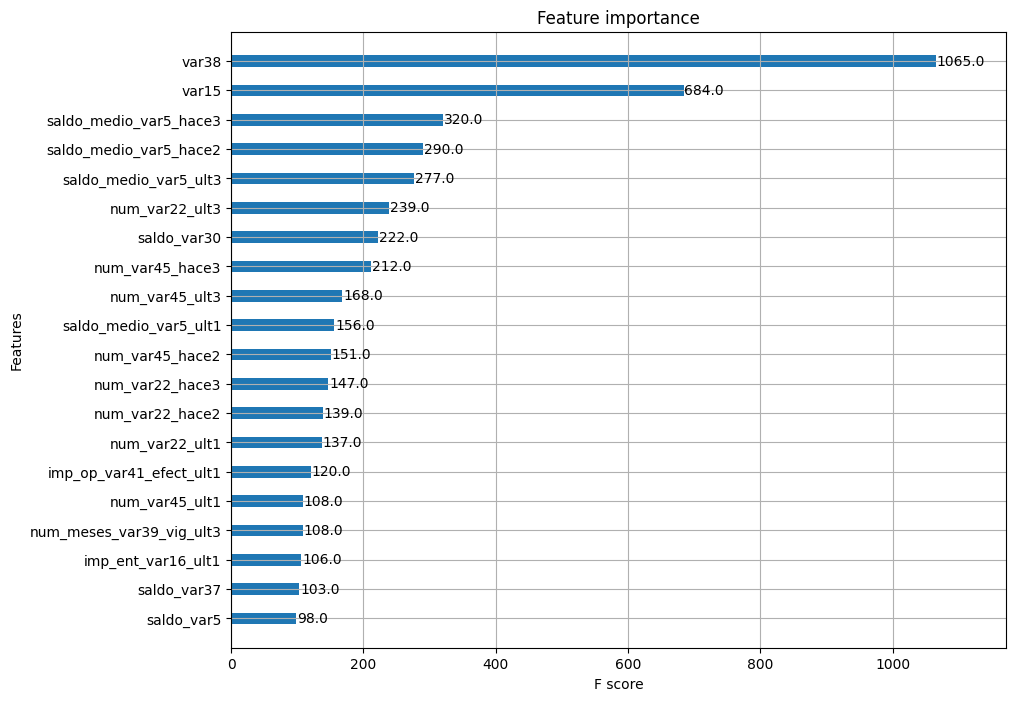

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

----
###**3. LightGBM 모델 학습 및 하이퍼 파라미터 튜닝**
데이터 전처리 과정은 앞 XGBoost와 동일

###1) 모델 생성, 학습, 평가

In [24]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(1)
    ], eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13308
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	trainin

###2) hyperOpt 이용 하이퍼파라미터 튜닝
**(1) 검색 공간 설정**

In [25]:
from hyperopt import hp
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

**(2) 목적 함수 설정**

In [27]:
from sklearn.model_selection import KFold
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']),
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []

    # 3개 k-fold방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr,  
        callbacks=[
            lgb.early_stopping(stopping_rounds=30),
        ], eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

**(3) fmin()으로 최적 하이퍼파라미터 찾기**

In [28]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출 max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출
best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=30,  ## 30번 반복
    trials=trials,
)

print('best:', best)

[LightGBM] [Info] Number of positive: 1579, number of negative: 38965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827                    
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872
[LightGBM] [Info] Start training from score -3.205872 
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:                    
[51]	training's auc: 0.89968	training's binary_logloss: 0.117405	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.135468
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018165 seconds.
You ca

### 3) 최적 하이퍼 파라미터 이용 학습 및 성능 측정

**(1) 최적 하이퍼 파라미터 이용하여 모델 선언**

In [29]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']),
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

**(2) 학습 수행**

In [31]:
lgbm_clf.fit(X_tr, y_tr, callbacks=[lgb.early_stopping(stopping_rounds=100)],
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12898
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[129]	training's auc: 0.899964	training's binary_logloss: 0.117129	valid_1's auc: 0.834172	valid_1's binary_logloss: 0.134652


LGBMClassifier(learning_rate=0.02909, max_depth=155, min_child_samples=88,
               n_estimators=500, num_leaves=33, subsample=0.96777)

**(3) 평가**

In [32]:
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8428


---
##4-10. 분류 실습, 신용카드 사기검출

**언더 샘플링**

많은 데이터 세트를 적은 데이터로 감소시킴

**오버 샘플링**

적은 데이터를 증식하여 학습을 위한 충분한 데이터를 확보

단순히 증식하지 않고, 원본 데이터 값을 아주 약간 변경하여 증식 ex) SMOTE

➡️ 주로 오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많음

**SMOTE(Synthetic Minority Over-sampling Technique)**
적은 데이터 세트에 있는 개별 데이터의 K 최근접 이웃을 찾아

데이터와 K개 이웃들의 차이를 일정 값으로 만들어 약간 차이나는 새 데이터 생성

### **1. 데이터 일차 가공 및 모델 학습/예측/평가**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [36]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True) # 불필요한 Time 컬럼 삭제
    return df_copy

In [37]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [7]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [39]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행.
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85279    16]
 [   58    90]]
정확도: 0.9991, 정밀도: 0.8491, 재현율: 0.6081,    F1: 0.7087, AUC:0.9536


In [40]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [41]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

### **2. 데이터 분포도 변환 후 모델 학습/예측/평가**

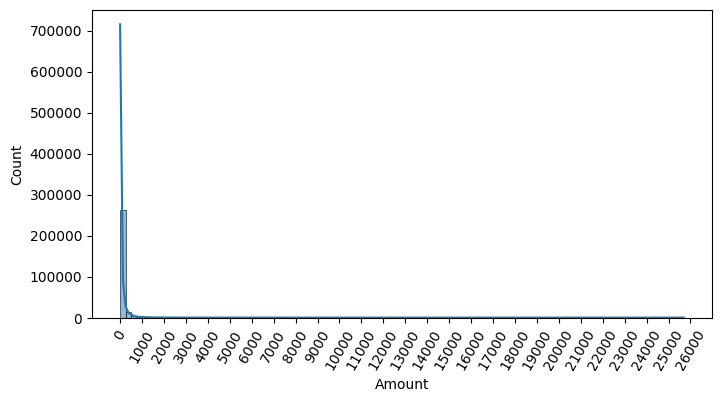

In [43]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [45]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [46]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [47]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

### **3.이상치 데이터 제거 후 모델 학습/예측/평가**

<Axes: >

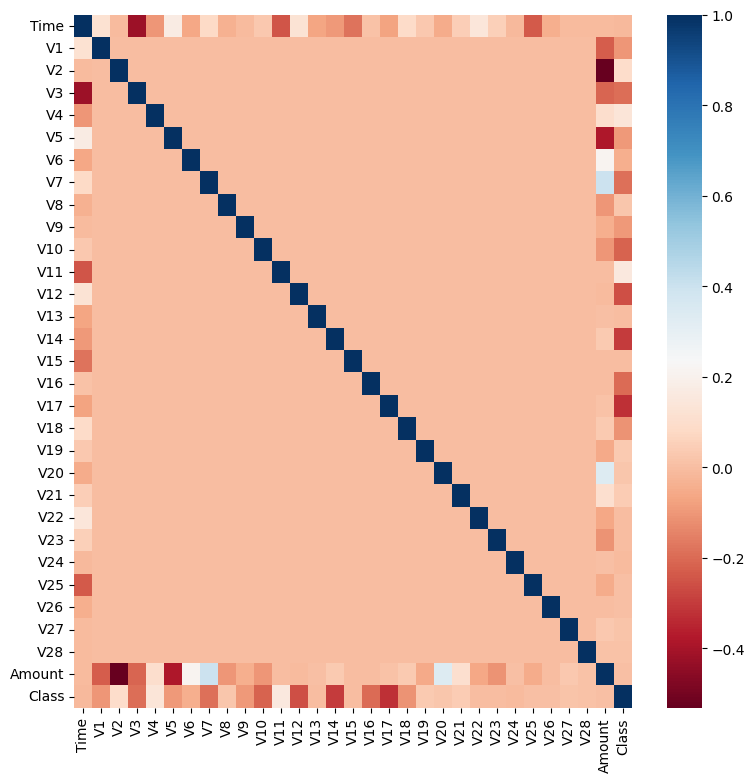

In [48]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [49]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [50]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [51]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

### **4.SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가**

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


In [53]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


In [55]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

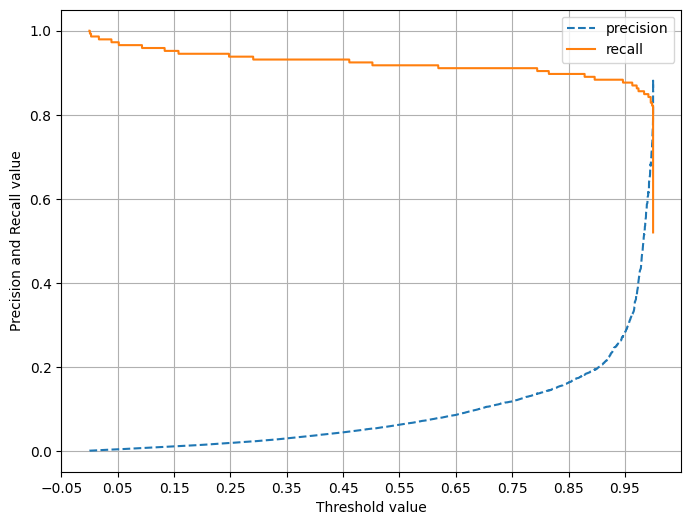

In [25]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [56]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split